## Variables and conventions

- All variables or functions are lowercase
- All matrices are uppercase
- Constants can mix cases, but uppercase preferentially
- All symbols should follow the structure `<prefix>_<symbol>[_<suffix>]` in code, or ${Symbol}_{prefix, suffix}$ in LaTeX, being the `<prefix>` the name of owner system, the `<suffix>` an optional differentiator. and the `<symbol>` as described as follow.

### Symbols
- t: time
- $i(t)$ or $I$: electrical current in [A]
- $v(t)$ or $V$: electrical voltage in [V]
- $q(t)$ or $Q$: either torque in [Nm] or electrical charge in [C]
- $t(t)$ or $T$: thrust in [N]
- $r(t)$ or $R$: hull resistance [N] or electrical resistance in [$\Omega$]
- $i_r(t)$ or $I_r$: rotational inertia in [kg m²]
- $u(t)$ or $U$: speed in [m/s]
- $w(t)$: angular speed in [rad/s]
- $n(t)$: angular speed in [rev/s]
- $m$: mass in [kg]
- $J$: propeller advance ratio
- $\eta(t)$: efficiency
- $e(t)$ or $E$: energy in [Wh]
- $p(t)$ or $P$: power in [W], or propeller pitch in [m]
- Z: number of (propeller) blades
- D: diameter in [m]
- L: length in [m]
- S: area in [m²]
- H: height/depth in [m]
- $W_f$: wake fraction
- $g(t)$ or $G$: (solar) irradiance [W/m^2]
- $\rho$: density in [kg/m³]
- $\mu$: viscosity in [N s/m]



# Propeller and Hull equations
Following:
- [Actuator Disk Theory](https://web.mit.edu/16.unified/www/FALL/thermodynamics/notes/node86.html)
- [Chapter 7 - Resistance and Powering of Ships, from EN400: Principles of Ship Performance](https://www.usna.edu/NAOE/_files/documents/Courses/EN400/02.07%20Chapter%207.pdf)
- [Michael Triantafyllou. Lecture 12 - Propellers and Propulsion, from Maneuvering and Control of Surface and Underwater Vehicles](https://ocw.mit.edu/courses/2-154-maneuvering-and-control-of-surface-and-underwater-vehicles-13-49-fall-2004/3eb3728a69a0e5c3a809e4111f7e036d_lec12.pdf)
- [Basic principles of ship propulsion](https://www.man-es.com/docs/default-source/document-sync-archive/basic-principles-of-ship-propulsion-eng.pdf)
- [Handbook of Marine Craft Hydrodynamics and Motion Control, Chapter 9](https://github.com/cybergalactic/FossenHandbook)
- [Breslin, J. P., & Andersen, P. (1994). Hydrodynamics of Ship Propellers](https://api.pageplace.de/preview/DT0400.9780511880018_A23680247/preview-9780511880018_A23680247.pdf)
- [Principles of Naval Architecture Second Revision, Propulsion / Section 4](https://ftp.idu.ac.id/wp-content/uploads/ebook/tdg/ADNVANCED%20MILITARY%20PLATFORM%20DESIGN/Principles%20of%20Naval%20Architecture%20(Second%20Revision),%20Volume%20II.pdf)

### Propeller (open water)

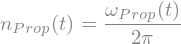

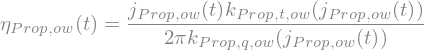

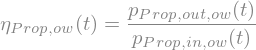

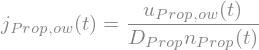

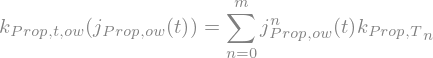

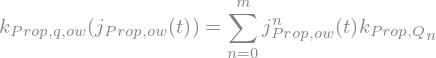

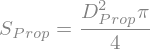

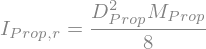

n_{Prop}{\left(t \right)} = \frac{\omega_{Prop}{\left(t \right)}}{2 \pi}
p_{Prop,in,ow}{\left(t \right)} = \omega_{Prop}{\left(t \right)} q_{Prop,ow}{\left(t \right)}
p_{Prop,out,ow}{\left(t \right)} = t_{Prop,ow}{\left(t \right)} u_{Prop,ow}{\left(t \right)}
\eta_{Prop,ow}{\left(t \right)} = \frac{j_{Prop,ow}{\left(t \right)} k_{Prop,t,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)}}{2 \pi k_{Prop,q,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)}}
\eta_{Prop,ow}{\left(t \right)} = \frac{p_{Prop,out,ow}{\left(t \right)}}{p_{Prop,in,ow}{\left(t \right)}}
j_{Prop,ow}{\left(t \right)} = \frac{u_{Prop,ow}{\left(t \right)}}{D_{Prop} n_{Prop}{\left(t \right)}}
t_{Prop,ow}{\left(t \right)} = D_{Prop}^{4} \rho_{water} k_{Prop,t,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)} n_{Prop}^{2}{\left(t \right)}
q_{Prop,ow}{\left(t \right)} = D_{Prop}^{5} \rho_{water} k_{Prop,q,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)} n_{Prop}^{2}{\left(t \right)}
k_{Prop,t,ow}{\left(j_{Prop,ow}{\left(t \right)

In [80]:
# Functions
prop_p_in_ow = f(r"p_{Prop,in,ow}", real=True, positive=True)(t)   # Propeller input mechanical power (torque power) [W]
prop_p_out_ow = f(r"p_{Prop,out,ow}", real=True, positive=True)(t)  # Propeller useful output power (thrust power) [W]
prop_q_ow = f(r"q_{Prop,ow}", real=True, positive=True)(t)        # Propeller torque (resistive load on shaft) [N·m]
prop_t_ow = f(r"t_{Prop,ow}", real=True, positive=True)(t)        # Propeller thrust force (propulsive force on hull) [N]
prop_w = f(r"\omega_{Prop}", real=True, positive=True)(t)        # Propeller angular speed [rad/s]
prop_n = f(r"n_{Prop}", real=True, positive=True)(t)             # Propeller angular speed [rev/s]
prop_u_ow = f(r"u_{Prop,ow}", real=True, positive=True)(t)        # Propeller inflow (axial) speed (advance speed "V_A"), typically ≃ hull speed [m/s]
prop_eta_ow = f(r"\eta_{Prop,ow}", real=True, positive=True)(t)   # Propeller efficiency, open water
prop_j_ow = f(r"j_{Prop,ow}", real=True, positive=True)(t)        # Propeller advance ratio, open water
prop_k_t_ow = f(r"k_{Prop,t,ow}")(prop_j_ow)                            # Propeller thrust coefficient, open water
prop_k_q_ow = f(r"k_{Prop,q,ow}")(prop_j_ow)                            # Propeller torque coefficient, open water

# Propeller Thrust open-water coefficient as a generic polynomial
prop_k_t_ow_k, prop_k_t_ow_deg = sym.symbols('n m', integer=True, real=True)
prop_k_t_ow_coeff = sym.IndexedBase('k_{Prop,T}')
prop_k_t_ow_coeffs = sym.sequence(prop_k_t_ow_coeff[prop_k_t_ow_k], (prop_k_t_ow_k, 0, prop_k_t_ow_deg))
eq_prop_k_t_ow = sym.Eq(
    prop_k_t_ow,
    sym.Sum(prop_k_t_ow_coeff[prop_k_t_ow_k] * sym.Pow(prop_j_ow, prop_k_t_ow_k), (prop_k_t_ow_k, 0, prop_k_t_ow_deg))
)

# Propeller Torque open-water coefficient as a generic polynomial
prop_k_q_ow_k, prop_k_q_ow_deg = sym.symbols('n m', integer=True, real=True)
prop_k_q_ow_coeff = sym.IndexedBase('k_{Prop,Q}')
prop_k_q_ow_coeffs = sym.sequence(prop_k_q_ow_coeff[prop_k_q_ow_k], (prop_k_q_ow_k, 0, prop_k_q_ow_deg))
eq_prop_k_q_ow = sym.Eq(
    prop_k_q_ow,
    sym.Sum(prop_k_q_ow_coeff[prop_k_q_ow_k] * sym.Pow(prop_j_ow, prop_k_q_ow_k), (prop_k_q_ow_k, 0, prop_k_q_ow_deg))
)

# Constants
(
    rho_water,  # Water density [kg/m^3]
    prop_D,     # Propeller diameter [m]
    prop_I_rr,    # Propeller rotational inertia [kg*m^2]
    prop_M,     # Propeller total mass [kg]
    prop_S,     # Propeller disk area [m^2]
) = sym.symbols(
    r"\rho_{water} D_{Prop} I_{Prop\,r} M_{Prop} S_{Prop}", real=True, constant=True, positive=True
)

eq_prop_S = sym.Eq(
    prop_S,
    pi * sym.Pow(prop_D, 2) * sym.Rational(1, 4)
)
eq_prop_I_rr = sym.Eq(
    prop_I_rr, prop_M * sym.Pow(prop_D/2, 2) / 2
)

# System equations
eq_prop_n = sym.Eq(prop_n, prop_w / (2*pi))
eq_prop_w = sym.Eq(prop_w, sym.solve(eq_prop_n, prop_w)[0])
eq_prop_j_ow = sym.Eq(
    prop_j_ow, prop_u_ow / (prop_n * prop_D)
)
eq_prop_t_ow = sym.Eq(
    prop_t_ow, prop_k_t_ow * rho_water * sym.Pow(prop_D, 4) * sym.Pow(prop_n, 2)
)
eq_prop_q_ow = sym.Eq(
    prop_q_ow, prop_k_q_ow * rho_water * sym.Pow(prop_D, 5) * sym.Pow(prop_n, 2)
)

# Power equations
eq_prop_p_in_ow = sym.Eq(
    prop_p_in_ow, prop_w * prop_q_ow
)
eq_prop_p_out_ow = sym.Eq(
    prop_p_out_ow, prop_u_ow * prop_t_ow
)
eq_prop_eta_ow = sym.Eq(
    prop_eta_ow, (sym.Rational(1, 2) / pi) * (prop_k_t_ow / prop_k_q_ow) * prop_j_ow
)
eq_prop_eta_ow2 = sym.Eq(
    prop_eta_ow, prop_p_out_ow / prop_p_in_ow
)
eq_prop_p_in_ow2 = sym.Eq(
    prop_p_in_ow, 2*pi * prop_k_q_ow * rho_water * sym.Pow(prop_n, 3) * sym.Pow(prop_D, 5)
)

eqs_prop = [eq_prop_n, eq_prop_p_in_ow, eq_prop_p_out_ow, eq_prop_eta_ow, eq_prop_eta_ow2, eq_prop_j_ow, eq_prop_t_ow, eq_prop_q_ow, eq_prop_k_t_ow, eq_prop_k_q_ow, eq_prop_p_in_ow2, eq_prop_S, eq_prop_I_rr]

[display(eq) for eq in eqs_prop];
[print(sym.latex(eq)) for eq in eqs_prop];

## Hull equations

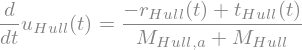

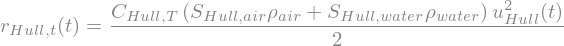

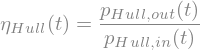

\frac{d}{d t} u_{Hull}{\left(t \right)} = \frac{- r_{Hull}{\left(t \right)} + t_{Hull}{\left(t \right)}}{M_{Hull,a} + M_{Hull}}
r_{Hull,t}{\left(t \right)} = \frac{C_{Hull,T} \left(S_{Hull,air} \rho_{air} + S_{Hull,water} \rho_{water}\right) u_{Hull}^{2}{\left(t \right)}}{2}
p_{Hull,out}{\left(t \right)} = r_{Hull,t}{\left(t \right)} u_{Hull}{\left(t \right)}
p_{Hull,in}{\left(t \right)} = t_{Hull}{\left(t \right)} u_{Hull}{\left(t \right)}
\eta_{Hull}{\left(t \right)} = \frac{p_{Hull,out}{\left(t \right)}}{p_{Hull,in}{\left(t \right)}}


In [81]:
# Functions
hull_u   = f(r"u_{Hull}",      real=True, positive=True)(t)   # Hull forward speed (translational velocity) [m/s]
hull_r_t = f(r"r_{Hull,t}",    real=True, positive=True)(t)   # Hull resistance (drag) force opposing motion when towed [N]
hull_r   = f(r"r_{Hull}",      real=True, positive=True)(t)   # Hull resistance (drag), self-propelled [N]
hull_t   = f(r"t_{Hull}",      real=True, positive=True)(t)   # Propulsive thrust force acting on hull [N] (from propeller)
hull_p_in  = f(r"p_{Hull,in}",   real=True, positive=True)(t)   # Mechanical power delivered to hull: P_in = T * u [W]
hull_p_out  = f(r"p_{Hull,out}",  real=True, positive=True)(t)   # Useful power to overcome resistance: P_out = R * u [W]
hull_eta = f(r"\eta_{Hull}",   real=True, positive=True)(t)   # Hull efficiency (P_out / P_in)

# Constants
(
    rho_air,        # Air density [kg/m³]
    hull_S_water,   # Wetted surface area in contact with water [m^2]
    hull_S_air,     # Projected or exposed surface area in contact with air [m^2]
    hull_C_T,         # Total resistance coefficient combining water and air effects, all lumped for simplicity
    hull_M,         # Fully loaded hull mass [kg]
    hull_M_a        # Hull hydrodynamic "added" mass [kg]
) = sym.symbols(
    r"\rho_{air} S_{Hull\,water} S_{Hull\,air} C_{Hull\,T} M_{Hull} M_{Hull\,a}",
    real=True, constant=True, positive=True
)

# System equation (longitudinal dynamics)
eq_hull_dudt = sym.Eq(
    d(hull_u, t),
    (hull_t - hull_r) / (hull_M + hull_M_a)
)
eqs_hull_sys = [eq_hull_dudt]

# Resistance model
eq_hull_r_t = sym.Eq(
    hull_r_t,
    sym.Rational(1, 2) * hull_C_T * (rho_water * hull_S_water + rho_air * hull_S_air) * sym.Pow(hull_u, 2)
)

# Power relations
eq_hull_p_out = sym.Eq(
    hull_p_out, hull_r_t * hull_u
)
eq_hull_p_in = sym.Eq(
    hull_p_in, hull_t * hull_u
)
eq_hull_eta = sym.Eq(
    hull_eta, hull_p_out / hull_p_in
)

eqs_hull = [eq_hull_r_t, eq_hull_p_out, eq_hull_p_in, eq_hull_eta]
[display(eq) for eq in eqs_hull_sys]
[display(eq) for eq in eqs_hull]

[print(sym.latex(eq)) for eq in eqs_hull_sys]
[print(sym.latex(eq)) for eq in eqs_hull];

In [82]:
# --- Hull initial condition ---

# Initial speed (given/injected)
hull_u_0 = sym.symbols(r"u_{Hull\,0}", real=True)

# Map initial scalar to state function
eq_hull_u_0 = sym.Eq(
    hull_u,
    hull_u_0,
    evaluate=False
)

# Steady-state condition: du/dt = 0  ⇒  hull_t = hull_r
res = sym.solve(
    [eq_hull_dudt.subs({eq_hull_dudt.lhs: 0})],
    [hull_t]
)
eq_hull_t_0 = sym.Eq(hull_t, res[hull_t]).simplify()

eqs_hull_0 = [
    eq_hull_u_0,
    eq_hull_t_0,
]

[display(eq) for eq in eqs_hull_0]
[print(sym.latex(eq)) for eq in eqs_hull_0];


u_{Hull}{\left(t \right)} = u_{Hull,0}
r_{Hull}{\left(t \right)} = t_{Hull}{\left(t \right)}


## Propeller-Hull coupling

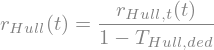

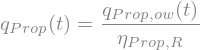

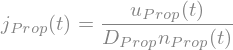

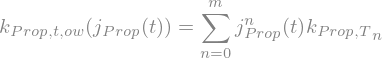

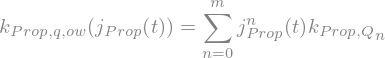

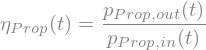

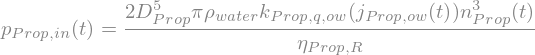

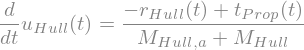

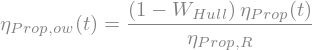

u_{Prop}{\left(t \right)} = \left(1 - W_{Hull}\right) u_{Hull}{\left(t \right)}
r_{Hull}{\left(t \right)} = \frac{r_{Hull,t}{\left(t \right)}}{1 - T_{Hull,ded}}
t_{Hull}{\left(t \right)} = t_{Prop}{\left(t \right)}
t_{Prop}{\left(t \right)} = t_{Prop,ow}{\left(t \right)}
q_{Prop}{\left(t \right)} = \frac{q_{Prop,ow}{\left(t \right)}}{\eta_{Prop,R}}
j_{Prop}{\left(t \right)} = \frac{u_{Prop}{\left(t \right)}}{D_{Prop} n_{Prop}{\left(t \right)}}
k_{Prop,t,ow}{\left(j_{Prop}{\left(t \right)} \right)} = \sum_{n=0}^{m} j_{Prop}^{n}{\left(t \right)} {k_{Prop,T}}_{n}
k_{Prop,q,ow}{\left(j_{Prop}{\left(t \right)} \right)} = \sum_{n=0}^{m} j_{Prop}^{n}{\left(t \right)} {k_{Prop,Q}}_{n}
p_{Prop,in}{\left(t \right)} = \omega_{Prop}{\left(t \right)} q_{Prop}{\left(t \right)}
p_{Prop,out}{\left(t \right)} = t_{Prop}{\left(t \right)} u_{Prop}{\left(t \right)}
\eta_{Prop}{\left(t \right)} = \frac{p_{Prop,out}{\left(t \right)}}{p_{Prop,in}{\left(t \right)}}
p_{Prop,in}{\left(t \right)} = \frac{2 D_{Pr

In [83]:
# Considering a quasi-static model for simplicity. For an improvement model, check Yorger et al.

# Functions
prop_p_in = f(r"p_{Prop,in}", real=True, positive=True)(t)   # Propeller input mechanical power (torque power) [W]
prop_p_out = f(r"p_{Prop,out}", real=True, positive=True)(t)  # Propeller useful output power (thrust power) [W]
prop_q = f(r"q_{Prop}", real=True, positive=True)(t)        # Propeller torque (resistive load on shaft) [N·m]
prop_t = f(r"t_{Prop}", real=True, positive=True)(t)        # Propeller thrust force (propulsive force on hull) [N]
prop_u = f(r"u_{Prop}", real=True, positive=True)(t)        # Propeller inflow (axial) speed (advance speed "V_A"), typically ≃ hull speed [m/s]
prop_eta = f(r"\eta_{Prop}", real=True, positive=True)(t)   # Propeller efficiency
prop_j = f(r"j_{Prop}", real=True, positive=True)(t)        # Propeller advance ratio, self-propelled
prop_k_t = f(r"k_{Prop,t}", real=True, positive=True)(prop_j)    # Propeller thrust coefficient, self-propelled
prop_k_q = f(r"k_{Prop,q}", real=True, positive=True)(prop_j)    # Propeller torque coefficient, self-propelled

# Constants
(
    prop_eta_R,  # Propeller rotative efficiency
    hull_W,      # Hull wake fraction
    hull_T_ded,  # Hull thrust deductive fraction
) = sym.symbols(
    r"\eta_{Prop\,R} W_{Hull} T_{Hull\,ded}", real=True, constant=True
)

# Up = U (1 − w); w is referred to as the wake fraction. A typical wake fraction of 0.1,
# for example, indicates that the incoming velocity seen by the propeller is only 90% of
# the vessel’s speed. The propeller is operating in a wake.
# In practical terms, the wake fraction comes about this way: Suppose the open water
# thrust of a propeller is known at a given U and np. Behind a vessel moving at speed
# U , and with the propeller spinning at the same np, the prop creates some extra thrust.
eq_prop_u = sym.Eq(
    prop_u, hull_u * (1 - hull_W)
)

# Rt = Rsp(1 − t). Often, a propeller will increase the resistance of the vessel by creating
# low-pressure on its intake side (near the hull), which makes Rsp > Rt. In this case, t
# is a small positive number, with 0.2 as a typical value. t is called the thrust deduction
# even though it is used to model resistance of the hull; it is obviously specific to both
# the hull and the propeller(s), and how they interact.
eq_hull_r_ded = sym.Eq(
    hull_r, hull_r_t / (1 - hull_T_ded)
)

# The force coupling: propeller thrust acts on hull
eq_hull_t = sym.Eq(
    hull_t, prop_t
)

# Thrust and torque relations:
eq_prop_t = sym.Eq(
    prop_t, prop_t_ow
)
# Qpo = η_R Qpsp . The rotative efficiency η_R, which may be greater than one, translates
# self-propelled torque to open water torque, for the same incident velocity Up, thrust
# T , and rotation rate np. η_R is meant to account for spatial variations in the wake
# of the vessel which are not captured by the wake fraction, as well as the turbulence
# induced by the hull. Note that in comparison with the wake fraction, rotative efficiency
# equalizes torque instead of thrust.
eq_prop_q = sym.Eq(
    prop_q, prop_q_ow / prop_eta_R
)

# Advance ratio behind hull
eq_prop_j = sym.Eq(
    prop_j, prop_u / (prop_n * prop_D)
)

eq_prop_k_t_ow2 = eq_prop_k_t_ow.subs({prop_j_ow: prop_j})
eq_prop_k_q_ow2 = eq_prop_k_q_ow.subs({prop_j_ow: prop_j})

# Power relations behind hull
eq_prop_p_in = sym.Eq(
    prop_p_in, prop_w * prop_q
)
eq_prop_p_out = sym.Eq(
    prop_p_out, prop_u * prop_t
)
eq_prop_eta = sym.Eq(
    prop_eta, prop_p_out / prop_p_in
)
eq_prop_p_in2 = eq_prop_p_in.subs({
    eq_prop_q.lhs: eq_prop_q.rhs,
}).subs({
    eq_prop_q_ow.lhs: eq_prop_q_ow.rhs,
}).subs({
    eq_prop_w.lhs: eq_prop_w.rhs,
})

# System equation coupled (substitute hull_t by prop_t in the dynamics)
eq_hull_dudt2 = eq_hull_dudt.subs(
    {eq_hull_t.lhs: eq_hull_t.rhs}
)

# Efficiency relation (from theory): η_ow = η (1 - w) / η_R
eq_prop_eta_relation = sym.Eq(
    prop_eta_ow,
    prop_eta * (1 - hull_W) / prop_eta_R
)

eqs_prop_hull = [
    eq_prop_u,
    eq_hull_r_ded,
    eq_hull_t,
    eq_prop_t,
    eq_prop_q,
    eq_prop_j,
    eq_prop_k_t_ow2,
    eq_prop_k_q_ow2,
    eq_prop_p_in,
    eq_prop_p_out,
    eq_prop_eta,
    eq_prop_p_in2,
    eq_hull_dudt2,
    eq_prop_eta_relation,
]

[display(eq) for eq in eqs_prop_hull]
[print(sym.latex(eq)) for eq in eqs_prop_hull];


# Transmission equations

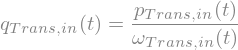

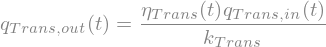

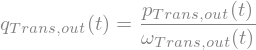

I_{Trans,r,in,Eq} = I_{Trans,r,in} + k_{Trans}^{2} \left(I_{Trans,r,out,Load} + I_{Trans,r,out}\right)
p_{Trans,in}{\left(t \right)} = \omega_{Trans,in}{\left(t \right)} q_{Trans,in}{\left(t \right)}
p_{Trans,out}{\left(t \right)} = \omega_{Trans,out}{\left(t \right)} q_{Trans,out}{\left(t \right)}
p_{Trans,out}{\left(t \right)} = \eta_{Trans}{\left(t \right)} p_{Trans,in}{\left(t \right)}
\omega_{Trans,out}{\left(t \right)} = k_{Trans} \omega_{Trans,in}{\left(t \right)}
q_{Trans,in}{\left(t \right)} = \frac{p_{Trans,in}{\left(t \right)}}{\omega_{Trans,in}{\left(t \right)}}
q_{Trans,out}{\left(t \right)} = \frac{\eta_{Trans}{\left(t \right)} q_{Trans,in}{\left(t \right)}}{k_{Trans}}
q_{Trans,out}{\left(t \right)} = \frac{p_{Trans,out}{\left(t \right)}}{\omega_{Trans,out}{\left(t \right)}}


In [84]:
# Functions
trans_q_in = f(r"q_{Trans,in}",  real=True, positive=True)(t)  # Transmission input torque (from motor) [N·m]
trans_q_out = f(r"q_{Trans,out}", real=True, positive=True)(t)  # Transmission output torque (to load/propeller) [N·m]
trans_w_in = f(r"\omega_{Trans,in}",  real=True, positive=True)(t)  # Transmission input angular speed [rad/s]
trans_w_out = f(r"\omega_{Trans,out}", real=True, positive=True)(t)  # Transmission output angular speed [rad/s]
trans_p_in = f(r"p_{Trans,in}",  real=True, positive=True)(t)  # Transmission input mechanical power [W]
trans_p_out = f(r"p_{Trans,out}", real=True, positive=True)(t)  # Transmission output mechanical power [W]
trans_eta = f(r"\eta_{Trans}",   real=True, positive=True)(t) # Transmission efficiency (0 < η ≤ 1) [–]

# Constants
(
    trans_k,         # Speed ratio: k = ω_out / ω_in  (k > 1 ⇒ speed increase; k < 1 ⇒ reduction) [–]
    trans_I_r_out,       # Rotational inertia of transmission output shaft about its axis [kg·m²]
    trans_I_r_in,       # Rotational inertia of transmission input shaft about its axis [kg·m²]
    trans_I_r_out_load,  # Inertia of external load (e.g., propeller) attached to transmission output [kg·m²]
    trans_I_r_in_equiv, # Total equivalent inertia reflected to input shaft: Ir_in + k² (Ir_out + Ir_out_load) [kg·m²]
) = sym.symbols(
    r"k_{Trans} I_{Trans\,r\,out} I_{Trans\,r\,in} I_{Trans\,r\,out\,Load} I_{Trans\,r\,in\,Eq}",
    real=True, constant=True, positive=True
)

eq_trans_I_r_in_equiv = sym.Eq(
    trans_I_r_in_equiv, trans_I_r_in + sym.Pow(trans_k, 2) * (trans_I_r_out + trans_I_r_out_load)
)

# Power equations
eq_trans_p_in = sym.Eq(
    trans_p_in, trans_w_in * trans_q_in
)
eq_trans_p_out = sym.Eq(
    trans_p_out, trans_w_out * trans_q_out
)
eq_trans_p_out2 = sym.Eq(
    trans_p_out, trans_eta * trans_p_in
)

# Kinematic and torque relations
eq_trans_w_out = sym.Eq(
    trans_w_out, trans_w_in * trans_k
)

eq_trans_q_in = sym.Eq(
    trans_q_in, trans_p_in / trans_w_in
)

# From P_out = η P_in and ω_out = k ω_in ⇒ Q_out = η Q_in / k
eq_trans_q_out = sym.Eq(
    trans_q_out, trans_eta * trans_q_in / trans_k
)

# (Optional consistency relation: Q_out = P_out / ω_out)
eq_trans_q_out2 = sym.Eq(
    trans_q_out, trans_p_out / trans_w_out
)

eqs_trans = [
    eq_trans_I_r_in_equiv,
    eq_trans_p_in,
    eq_trans_p_out,
    eq_trans_p_out2,
    eq_trans_w_out,
    eq_trans_q_in,
    eq_trans_q_out,
    eq_trans_q_out2,
]

[display(eq) for eq in eqs_trans]
[print(sym.latex(eq)) for eq in eqs_trans];

# Transmission-Propeller coupling

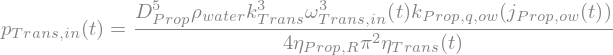

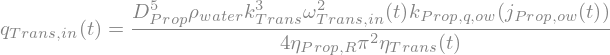

\omega_{Prop}{\left(t \right)} = \omega_{Trans,out}{\left(t \right)}
p_{Prop,in}{\left(t \right)} = p_{Trans,out}{\left(t \right)}
p_{Prop,in}{\left(t \right)} = \eta_{Trans}{\left(t \right)} p_{Trans,in}{\left(t \right)}
\omega_{Prop}{\left(t \right)} = k_{Trans} \omega_{Trans,in}{\left(t \right)}
q_{Trans,out}{\left(t \right)} = q_{Prop}{\left(t \right)}
I_{Trans,r,out,Load} = I_{Prop,r}
p_{Trans,in}{\left(t \right)} = \frac{D_{Prop}^{5} \rho_{water} k_{Trans}^{3} \omega_{Trans,in}^{3}{\left(t \right)} k_{Prop,q,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)}}{4 \eta_{Prop,R} \pi^{2} \eta_{Trans}{\left(t \right)}}
q_{Trans,in}{\left(t \right)} = \frac{D_{Prop}^{5} \rho_{water} k_{Trans}^{3} \omega_{Trans,in}^{2}{\left(t \right)} k_{Prop,q,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)}}{4 \eta_{Prop,R} \pi^{2} \eta_{Trans}{\left(t \right)}}


In [85]:
# Kinematic coupling: transmission output shaft drives propeller
eq_prop_w_couple = sym.Eq(
    prop_w, trans_w_out
)

# Power coupling: transmission output power goes into propeller
eq_prop_p_in_couple = sym.Eq(
    prop_p_in, trans_p_out
)

# Torque coupling: transmission output torque equals propeller torque
eq_trans_q_out_couple = sym.Eq(
    trans_q_out, prop_q
)

# Inertia coupling: propeller inertia appears as load inertia at transmission output
eq_trans_I_r_out_load_couple = sym.Eq(
    trans_I_r_out_load, prop_I_rr
)

# Derived relations using transmission equations:
#   trans_p_out = η_Trans * trans_p_in
eq_prop_p_in_from_trans_input = eq_prop_p_in_couple.subs(
    {eq_trans_p_out2.lhs: eq_trans_p_out2.rhs}
)
#   trans_w_out = k_Trans * trans_w_in
eq_prop_w_from_trans_input = eq_prop_w_couple.subs(
    {eq_trans_w_out.lhs: eq_trans_w_out.rhs}
)

# Apply:
#   prop_p_in = trans_eta * trans_p_in
#   prop_n  = prop_w / (2π)
#   prop_w  = trans_w_out
#   trans_w_out = trans_w_in * trans_k
eq_prop_p_in2_sub = (
    eq_prop_p_in2
    .subs({eq_prop_p_in_from_trans_input.lhs: eq_prop_p_in_from_trans_input.rhs})
    .subs({eq_prop_n.lhs: eq_prop_n.rhs})
    .subs({eq_prop_w_couple.lhs: eq_prop_w_couple.rhs})
    .subs({eq_trans_w_out.lhs: eq_trans_w_out.rhs})
)

eq_trans_p_in2 = sym.Eq(
    trans_p_in,
    sym.simplify(sym.solve(eq_prop_p_in2_sub, trans_p_in)[0])
)

eq_trans_q_in2 = eq_trans_q_in.subs(
    eq_trans_p_in2.lhs, eq_trans_p_in2.rhs
)

eqs_prop_trans_coupling = [
    eq_prop_w_couple,
    eq_prop_p_in_couple,
    eq_prop_p_in_from_trans_input,
    eq_prop_w_from_trans_input,
    eq_trans_q_out_couple,
    eq_trans_I_r_out_load_couple,
    eq_trans_p_in2,
    eq_trans_q_in2,
]

[display(eq) for eq in eqs_prop_trans_coupling]
[print(sym.latex(eq)) for eq in eqs_prop_trans_coupling];

# Motor Equations

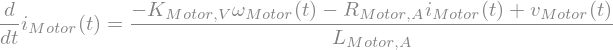

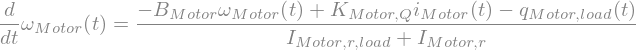

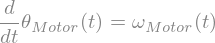

\frac{d}{d t} i_{Motor}{\left(t \right)} = \frac{- K_{Motor,V} \omega_{Motor}{\left(t \right)} - R_{Motor,A} i_{Motor}{\left(t \right)} + v_{Motor}{\left(t \right)}}{L_{Motor,A}}
\frac{d}{d t} \omega_{Motor}{\left(t \right)} = \frac{- B_{Motor} \omega_{Motor}{\left(t \right)} + K_{Motor,Q} i_{Motor}{\left(t \right)} - q_{Motor,load}{\left(t \right)}}{I_{Motor,r,load} + I_{Motor,r}}
\frac{d}{d t} \theta_{Motor}{\left(t \right)} = \omega_{Motor}{\left(t \right)}


p_{Motor,in}{\left(t \right)} = i_{Motor}{\left(t \right)} v_{Motor}{\left(t \right)}
p_{Motor,out}{\left(t \right)} = \omega_{Motor}{\left(t \right)} q_{Motor,load}{\left(t \right)}
p_{Motor,loss}{\left(t \right)} = B_{Motor} \omega_{Motor}^{2}{\left(t \right)} + R_{Motor,A} i_{Motor}^{2}{\left(t \right)}
p_{Motor,out}{\left(t \right)} = \eta_{Motor}{\left(t \right)} p_{Motor,in}{\left(t \right)}


In [86]:
# Functions
motor_i = f(r"i_{Motor}", real=True, positive=True)(t)             # Armature current [A]
motor_v = f(r"v_{Motor}", real=True, positive=True)(t)             # Terminal voltage [V]
motor_w = f(r"\omega_{Motor}", real=True, positive=True)(t)        # Angular speed [rad/s]
motor_ang = f(r"\theta_{Motor}", real=True, positive=True)(t)      # Angular position [rad]
motor_q_load = f(r"q_{Motor,load}", real=True, positive=True)(t)   # Load torque [N·m]

motor_p_in = f(r"p_{Motor,in}", real=True, positive=True)(t)         # Electrical input power [W]
motor_p_out = f(r"p_{Motor,out}", real=True, positive=True)(t)        # Mechanical output power [W]
motor_pl = f(r"p_{Motor,loss}", real=True, positive=True)(t)       # Motor losses [W]
motor_eta = f(r"\eta_{Motor}", real=True, positive=True)(t)        # Efficiency

# Constants
(
    motor_R_A,     # Armature resistance [Ω]
    motor_L_A,     # Armature inductance [H]
    motor_K_Q,     # Torque constant K_t [N·m/A]
    motor_K_V,     # Back-EMF constant K_e [V·s/rad]
    motor_I_r,      # Rotor inertia [kg·m²]
    motor_I_r_load, # Equivalent reflected load inertia [kg·m²]
    motor_B        # Viscous friction [N·m·s/rad]
) = sym.symbols(
    r"R_{Motor\,A} L_{Motor\,A} K_{Motor\,Q} K_{Motor\,V} I_{Motor\,r} I_{Motor\,r\,load} B_{Motor}",
    real=True, constant=True, positive=True
)

# --- System equations ---

# Electrical dynamics:  di/dt = (V - R i - K_e ω) / L
eq_motor_didt = sym.Eq(
    d(motor_i, t),
    (motor_v - motor_R_A * motor_i - motor_K_V * motor_w) / motor_L_A
)

# Mechanical dynamics: dω/dt = (K_t i - Bω - Q_load) / (Ir + Ir_load)
eq_motor_dwdt = sym.Eq(
    d(motor_w, t),
    (motor_K_Q * motor_i - motor_B * motor_w - motor_q_load) /
    (motor_I_r + motor_I_r_load)
)

# Kinematic: dθ/dt = ω
eq_motor_dangdt = sym.Eq(
    d(motor_ang, t), motor_w
)

eqs_motor_sys = [eq_motor_didt, eq_motor_dwdt, eq_motor_dangdt]
[display(eq) for eq in eqs_motor_sys]
[print(sym.latex(eq)) for eq in eqs_motor_sys]

# --- Power equations ---

# Electrical input power
eq_motor_p_in = sym.Eq(
    motor_p_in, motor_i * motor_v
)

# Mechanical output power
eq_motor_p_out = sym.Eq(
    motor_p_out, motor_w * motor_q_load
)

# Losses: copper + viscous (B ω²)
eq_motor_pl = sym.Eq(
    motor_pl, motor_R_A * motor_i**2 + motor_B * motor_w**2
)

# Efficiency definition: P_out = η P_in
eq_motor_p_out2 = sym.Eq(
    motor_p_out, motor_eta * motor_p_in
)

eqs_motor_p_outwer = [eq_motor_p_in, eq_motor_p_out, eq_motor_pl, eq_motor_p_out2]
[display(eq) for eq in eqs_motor_p_outwer]
[print(sym.latex(eq)) for eq in eqs_motor_p_outwer];

### Motor Initial condition

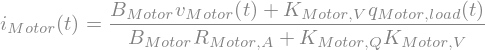

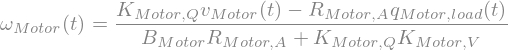

i_{Motor}{\left(t \right)} = \frac{B_{Motor} v_{Motor}{\left(t \right)} + K_{Motor,V} q_{Motor,load}{\left(t \right)}}{B_{Motor} R_{Motor,A} + K_{Motor,Q} K_{Motor,V}}
\omega_{Motor}{\left(t \right)} = \frac{K_{Motor,Q} v_{Motor}{\left(t \right)} - R_{Motor,A} q_{Motor,load}{\left(t \right)}}{B_{Motor} R_{Motor,A} + K_{Motor,Q} K_{Motor,V}}


In [87]:
# Initial conditions for steady-state inputs (voltage and torque)

res = sym.solve([
        eq_motor_didt.subs({eq_motor_didt.lhs: 0}),
        eq_motor_dwdt.subs({eq_motor_dwdt.lhs: 0}),
    ],
    [motor_i, motor_w]
)
eq_motor_i_0 = sym.Eq(motor_i, res[motor_i]).simplify()
eq_motor_w_0 = sym.Eq(motor_w, res[motor_w]).simplify()

eqs_motor_0 = [eq_motor_i_0, eq_motor_w_0]
[display(eq) for eq in eqs_motor_0];
[print(sym.latex(eq)) for eq in eqs_motor_0];

# Motor-Transmission Coupling

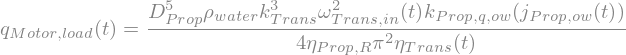

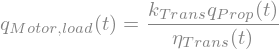

\omega_{Trans,in}{\left(t \right)} = \omega_{Motor}{\left(t \right)}
p_{Trans,in}{\left(t \right)} = \eta_{Motor}{\left(t \right)} p_{Motor,in}{\left(t \right)}
q_{Trans,in}{\left(t \right)} = q_{Motor,load}{\left(t \right)}
I_{Motor,r,load} = I_{Trans,r,in} + k_{Trans}^{2} \left(I_{Prop,r} + I_{Trans,r,out}\right)
q_{Motor,load}{\left(t \right)} = q_{Trans,in}{\left(t \right)}
q_{Motor,load}{\left(t \right)} = \frac{D_{Prop}^{5} \rho_{water} k_{Trans}^{3} \omega_{Trans,in}^{2}{\left(t \right)} k_{Prop,q,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)}}{4 \eta_{Prop,R} \pi^{2} \eta_{Trans}{\left(t \right)}}
q_{Motor,load}{\left(t \right)} = \frac{k_{Trans} q_{Prop}{\left(t \right)}}{\eta_{Trans}{\left(t \right)}}


In [88]:
# --- Motor–Transmission coupling ---

# 1) Basic coupling relations

# Speed coupling: motor shaft drives transmission input
eq_trans_w_in = sym.Eq(
    trans_w_in, motor_w
)

# Power coupling: motor mechanical output power = transmission input power
eq_trans_p_in3 = sym.Eq(
    trans_p_in, motor_p_out
)

# Torque coupling: motor load torque = transmission input torque
eq_trans_q_in3 = sym.Eq(
    trans_q_in, motor_q_load
)

# Inertia coupling: all transmission + propeller inertia reflected to motor shaft
eq_motor_I_r_load = sym.Eq(
    motor_I_r_load, trans_I_r_in_equiv
).subs({
    eq_trans_I_r_in_equiv.lhs: eq_trans_I_r_in_equiv.rhs,   # Ir_in,Eq = Ir_in + k² (Ir_out + Ir_out_load)
    eq_trans_I_r_out_load_couple.lhs: eq_trans_I_r_out_load_couple.rhs,  # Ir_out,Load = Ir_prop
})

# Use motor efficiency relation for power: P_Motor,out = η_Motor * P_Motor,in
eq_trans_p_in3 = eq_trans_p_in3.subs({
    eq_motor_p_out2.lhs: eq_motor_p_out2.rhs   # motor_p_out = motor_eta * motor_p_in
})

# --- 2) Transmission input torque expression (re-introduce eq_trans_q_in2) ---

# We already have:
#   eq_trans_p_in2: trans_p_in = ...  (from prop + trans coupling)
#   eq_trans_q_in:  trans_q_in = trans_p_in / trans_w_in
#
# So: trans_q_in2 = trans_q_in(trans_w_in) by substitution.

eq_trans_q_in2 = eq_trans_q_in.subs({
    eq_trans_p_in2.lhs: eq_trans_p_in2.rhs
})
# (You can optionally sym.simplify(eq_trans_q_in2) here)

# --- 3) Motor load torque as explicit function of transmission input speed (and then motor speed) ---

# Start from the defining coupling: motor_q_load = trans_q_in
eq_motor_q_load = sym.Eq(
    eq_trans_q_in3.rhs, eq_trans_q_in3.lhs
)
# Substitute:
#   trans_q_in <- eq_trans_q_in2
#   trans_w_in <- motor_w
eq_motor_q_load2 = eq_motor_q_load.subs({
    eq_trans_q_in2.lhs: eq_trans_q_in2.rhs,
    eq_trans_w_in.lhs:  eq_trans_w_in.rhs,
})

# This gives motor_q_load = f(motor_w, prop_k_q, D, ρ, k_Trans, η_Trans, ...)

eq_motor_q_load_prop = sym.Eq(
    motor_q_load,
    sym.simplify(
        sym.solve(
            eq_trans_q_out
            .subs({eq_trans_q_out_couple.lhs: eq_trans_q_out_couple.rhs})  # trans_q_out -> prop_q
            .subs({eq_trans_q_in3.lhs: eq_trans_q_in3.rhs}),             # trans_q_in -> motor_q_load
            motor_q_load
        )[0]
    )
)

eqs_motor_trans_coupling = [
    eq_trans_w_in,
    eq_trans_p_in3,
    eq_trans_q_in3,
    eq_motor_I_r_load,
    eq_motor_q_load,
    eq_motor_q_load2,
    eq_motor_q_load_prop,
]

[display(eq) for eq in eqs_motor_trans_coupling]
[print(sym.latex(eq)) for eq in eqs_motor_trans_coupling];

# ESC equations

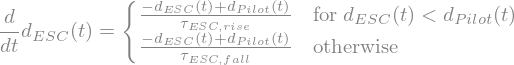

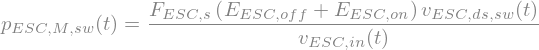

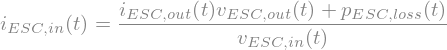

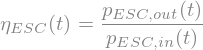

\frac{d}{d t} d_{ESC}{\left(t \right)} = \begin{cases} \frac{- d_{ESC}{\left(t \right)} + d_{Pilot}{\left(t \right)}}{\tau_{ESC,rise}} & \text{for}\: d_{ESC}{\left(t \right)} < d_{Pilot}{\left(t \right)} \\\frac{- d_{ESC}{\left(t \right)} + d_{Pilot}{\left(t \right)}}{\tau_{ESC,fall}} & \text{otherwise} \end{cases}
v_{ESC,out}{\left(t \right)} = d_{ESC}{\left(t \right)} v_{ESC,in}{\left(t \right)}
v_{ESC,ds,sw}{\left(t \right)} = \left(V_{ESC,ds,ov} + 1\right) v_{ESC,in}{\left(t \right)}
i_{ESC,M,RMS}{\left(t \right)} = \sqrt{d_{ESC}{\left(t \right)}} i_{ESC,out}{\left(t \right)}
i_{ESC,D,RMS}{\left(t \right)} = \sqrt{1 - d_{ESC}{\left(t \right)}} i_{ESC,out}{\left(t \right)}
i_{ESC,D,AVG}{\left(t \right)} = \left(1 - d_{ESC}{\left(t \right)}\right) i_{ESC,out}{\left(t \right)}
p_{ESC,M,cond}{\left(t \right)} = R_{ESC,ds,on} i_{ESC,M,RMS}^{2}{\left(t \right)}
p_{ESC,D,cond}{\left(t \right)} = V_{ESC,F} i_{ESC,D,AVG}{\left(t \right)} + r_{ESC,D} i_{ESC,D,RMS}^{2}{\left(t \right)}
p_{ESC

In [89]:
import sympy as sym

d = sym.Derivative
f = sym.Function
t = sym.symbols("t", constant=False)

# --- States / inputs (as already defined in your ESC block) ---

esc_d   = f(r"d_{ESC}",    real=True, positive=True)(t)   # ESC duty-cycle
pilot_d = f(r"d_{Pilot}",  real=True, positive=True)(t)   # Pilot throttle command

esc_p_in  = f(r"p_{ESC,in}",  real=True, positive=True)(t)  # ESC input power  (from battery)
esc_p_out  = f(r"p_{ESC,out}", real=True, positive=True)(t)  # ESC output power (to motor)
esc_v_in  = f(r"v_{ESC,in}",  real=True, positive=True)(t)  # ESC input voltage (battery bus)
esc_v_out  = f(r"v_{ESC,out}", real=True, positive=True)(t)  # ESC output voltage (avg motor terminal)
esc_i_in  = f(r"i_{ESC,in}",  real=True, positive=True)(t)  # ESC input current (from battery)
esc_i_out  = f(r"i_{ESC,out}", real=True, positive=True)(t)  # ESC output current (to motor)
esc_eta = f(r"\eta_{ESC}",  real=True, positive=True)(t)  # ESC efficiency

# --- Intermediate RMS / loss variables (as functions for clarity) ---

esc_vds_sw   = f(r"v_{ESC,ds,sw}",  real=True, positive=True)(t)  # Vds during switching incl. overshoot
esc_i_m_rms  = f(r"i_{ESC,M,RMS}",  real=True, positive=True)(t)  # MOSFET RMS current
esc_i_d_rms  = f(r"i_{ESC,D,RMS}",  real=True, positive=True)(t)  # Diode RMS current
esc_i_d_avg  = f(r"i_{ESC,D,AVG}",  real=True, positive=True)(t)  # Diode average current

esc_p_m_c    = f(r"p_{ESC,M,cond}", real=True, positive=True)(t)  # MOSFET conduction loss
esc_p_d_c    = f(r"p_{ESC,D,cond}", real=True, positive=True)(t)  # Diode conduction loss
esc_p_m_sw   = f(r"p_{ESC,M,sw}",   real=True, positive=True)(t)  # MOSFET switching loss
esc_p_d_sw   = f(r"p_{ESC,D,sw}",   real=True, positive=True)(t)  # Diode switching loss
esc_p_loss   = f(r"p_{ESC,loss}",   real=True, positive=True)(t)  # Total ESC loss

# --- Constants ---

(
    esc_tau_rise,  # Duty-cycle first-order lag rise time constant
    esc_tau_fall  # Duty-cycle first-order lag fall time constant
) = sym.symbols(
    r"\tau_{ESC\,rise} \tau_{ESC\,fall}",
    real=True, constant=True, positive=True
)

# Loss-model parameters (from your Python class)
(
    esc_Fs,      # Switching frequency [Hz]
    esc_Vds_ov,  # Fractional Vds overshoot
    esc_Rds_on,  # MOSFET Rds(on) [Ω]
    esc_E_on,    # Turn-on energy [J]
    esc_E_off,   # Turn-off energy [J]
    esc_V_F,     # Diode forward drop [V]
    esc_r_D,     # Diode dynamic resistance [Ω]
    esc_Qrr      # Diode reverse-recovery charge [C]
) = sym.symbols(
    r"F_{ESC\,s} V_{ESC\,ds\,ov} R_{ESC\,ds\,on} E_{ESC\,on} E_{ESC\,off} V_{ESC\,F} r_{ESC\,D} Q_{ESC\,rr}",
    real=True, constant=True, positive=True
)

# --- Dynamics: esc_d(pilot_d) ---

eq_esc_dddt = sym.Eq(
    d(esc_d, t),
    sym.Piecewise(
        ((pilot_d - esc_d) / esc_tau_rise, pilot_d > esc_d),
        ((pilot_d - esc_d) / esc_tau_fall, True),  # covers pilot_d <= esc_d
    )
)

# --- Ideal buck relations (as in the class) ---

eq_esc_v_out = sym.Eq(
    esc_v_out, esc_d * esc_v_in
)

# --- Switching-node voltage with overshoot ---

eq_esc_vds_sw = sym.Eq(
    esc_vds_sw, esc_v_in * (1 + esc_Vds_ov)
)

# --- RMS and average currents (no ripple approximation) ---

eq_esc_i_m_rms = sym.Eq(
    esc_i_m_rms, sym.sqrt(esc_d) * esc_i_out
)
eq_esc_i_d_rms = sym.Eq(
    esc_i_d_rms, sym.sqrt(1 - esc_d) * esc_i_out
)
eq_esc_i_d_avg = sym.Eq(
    esc_i_d_avg, (1 - esc_d) * esc_i_out
)

# --- Conduction losses ---

eq_esc_p_m_c = sym.Eq(
    esc_p_m_c, esc_i_m_rms**2 * esc_Rds_on
)

eq_esc_p_d_c = sym.Eq(
    esc_p_d_c, esc_V_F * esc_i_d_avg + esc_r_D * esc_i_d_rms**2
)

# --- Switching losses ---

eq_esc_p_m_sw = sym.Eq(
    esc_p_m_sw, (esc_E_on + esc_E_off) * esc_Fs * (esc_vds_sw / esc_v_in)
)

eq_esc_p_d_sw = sym.Eq(
    esc_p_d_sw, esc_Qrr * esc_vds_sw * esc_Fs
)

# --- Total ESC loss power ---

eq_esc_p_loss = sym.Eq(
    esc_p_loss, esc_p_m_c + esc_p_d_c + esc_p_m_sw + esc_p_d_sw
)

# --- Power and currents: input current from power balance ---

# Input and output power
eq_esc_p_in = sym.Eq(
    esc_p_in, esc_i_in * esc_v_in
)
eq_esc_p_out = sym.Eq(
    esc_p_out, esc_i_out * esc_v_out
)

# All loss mapped to input current:  P_in = P_out + P_loss
#  => I_in = (V_out I_out + P_loss) / V_in
eq_esc_i_in = sym.Eq(
    esc_i_in, (esc_v_out * esc_i_out + esc_p_loss) / esc_v_in
)

# Efficiency definition
eq_esc_eta = sym.Eq(
    esc_eta, esc_p_out / esc_p_in
)

# (Optional redundancy, if you want both forms)
eq_esc_p_in2 = sym.Eq(
    esc_p_in, esc_p_out + esc_p_loss
)
eq_esc_p_out2 = sym.Eq(
    esc_p_out, esc_eta * esc_p_in
)

# --- Collect equations ---

eqs_esc = [
    eq_esc_dddt,
    eq_esc_v_out,
    eq_esc_vds_sw,
    eq_esc_i_m_rms,
    eq_esc_i_d_rms,
    eq_esc_i_d_avg,
    eq_esc_p_m_c,
    eq_esc_p_d_c,
    eq_esc_p_m_sw,
    eq_esc_p_d_sw,
    eq_esc_p_loss,
    eq_esc_p_in,
    eq_esc_p_out,
    eq_esc_i_in,
    eq_esc_eta,
    eq_esc_p_in2,
    eq_esc_p_out2,
]

[display(eq) for eq in eqs_esc]
[print(sym.latex(eq)) for eq in eqs_esc];

### ESC initial condition

In [90]:
eq_esc_d_0 = sym.Eq(esc_d, pilot_d)

eqs_esc_0 = [eq_esc_d_0]
[display(eq) for eq in eqs_esc_0]
[print(sym.latex(eq)) for eq  in eqs_esc_0];

d_{ESC}{\left(t \right)} = d_{Pilot}{\left(t \right)}


# ESC-Motor Coupling

In [91]:
# --- ESC → Motor Electrical Coupling ---

# 1) Motor input power equals ESC output power
eq_esc_motor_p_outwer = sym.Eq(
    motor_p_in,    # Motor electrical input power
    esc_p_out       # ESC electrical output power
)

# 2) Motor terminal voltage equals ESC output voltage
eq_motor_v = sym.Eq(
    motor_v,     # Motor terminal voltage
    esc_v_out       # ESC output voltage
).subs({
    eq_esc_v_out.lhs: eq_esc_v_out.rhs    # esc_v_out = esc_d * esc_v_in
})

# 3) Motor armature current equals ESC output current
eq_esc_motor_current = sym.Eq(
    motor_i,     # Motor armature current
    esc_i_out       # ESC output current
)

#   esc_p_out = η_ESC * esc_p_in
eq_motor_p_in_eta_form = sym.Eq(
    motor_p_in,
    (eq_esc_p_out2.rhs)   # esc_eta * esc_p_in
).subs({
    eq_esc_p_out2.lhs: eq_esc_p_out2.rhs
})

eq_esc_eta2 = sym.Eq(
    eq_esc_eta.lhs,
    sym.simplify(
        eq_esc_eta.rhs.subs(eq_esc_p_in2.lhs, eq_esc_p_in2.rhs)
    )
)

eq_esc_eta3 = eq_esc_eta2.subs({
    eq_esc_p_out.lhs: eq_esc_p_out.rhs,   # esc_p_out   = esc_i_out * esc_v_out
    eq_esc_p_loss.lhs: eq_esc_p_loss.rhs,
})

eq_esc_eta4 = eq_esc_eta3.subs({
    eq_esc_p_d_c.lhs: eq_esc_p_d_c.rhs,
    eq_esc_p_d_sw.lhs: eq_esc_p_d_sw.rhs,
    eq_esc_p_m_c.lhs: eq_esc_p_m_c.rhs,
    eq_esc_p_m_sw.lhs: eq_esc_p_m_sw.rhs,
})

eq_esc_eta5 = eq_esc_eta4.subs({
    eq_esc_i_m_rms.lhs:  eq_esc_i_m_rms.rhs,
    eq_esc_i_d_rms.lhs:  eq_esc_i_d_rms.rhs,
    eq_esc_i_d_avg.lhs:  eq_esc_i_d_avg.rhs,
    eq_esc_vds_sw.lhs:  eq_esc_vds_sw.rhs,
})

# --- Pack results ---

eqs_esc_motor = [
    eq_esc_motor_p_outwer,
    eq_motor_v,
    eq_esc_motor_current,
    eq_motor_p_in_eta_form,
]

[display(eq) for eq in eqs_esc_motor]
[print(sym.latex(eq)) for eq in eqs_esc_motor];

p_{Motor,in}{\left(t \right)} = p_{ESC,out}{\left(t \right)}
v_{Motor}{\left(t \right)} = d_{ESC}{\left(t \right)} v_{ESC,in}{\left(t \right)}
i_{Motor}{\left(t \right)} = i_{ESC,out}{\left(t \right)}
p_{Motor,in}{\left(t \right)} = \eta_{ESC}{\left(t \right)} p_{ESC,in}{\left(t \right)}


# Battery Equations

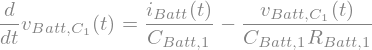

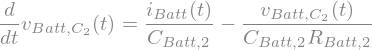

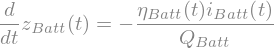

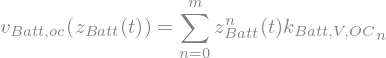

\frac{d}{d t} v_{Batt,C_1}{\left(t \right)} = \frac{i_{Batt}{\left(t \right)}}{C_{Batt,1}} - \frac{v_{Batt,C_1}{\left(t \right)}}{C_{Batt,1} R_{Batt,1}}
\frac{d}{d t} v_{Batt,C_2}{\left(t \right)} = \frac{i_{Batt}{\left(t \right)}}{C_{Batt,2}} - \frac{v_{Batt,C_2}{\left(t \right)}}{C_{Batt,2} R_{Batt,2}}
v_{Batt}{\left(t \right)} = N_{Batt,S} \left(- R_{Batt,0} i_{Batt}{\left(t \right)} - v_{Batt,C_1}{\left(t \right)} - v_{Batt,C_2}{\left(t \right)} + v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)}\right)
\frac{d}{d t} z_{Batt}{\left(t \right)} = - \frac{\eta_{Batt}{\left(t \right)} i_{Batt}{\left(t \right)}}{Q_{Batt}}
\left\{{k_{Batt,V,OC}}_{n}\right\}_{n=0}^{m}
v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)} = \sum_{n=0}^{m} z_{Batt}^{n}{\left(t \right)} {k_{Batt,V,OC}}_{n}


In [ ]:
# System Functions
batt_i    = f(r"i_{Batt}",        real=True, positive=True)(t)  # Terminal current (discharge > 0) [A]
batt_v_C1 = f(r"v_{Batt,C_1}",   real=True)(t)                 # Polarization voltage across C1 [V]
batt_v_C2 = f(r"v_{Batt,C_2}",   real=True)(t)                 # Polarization voltage across C2 [V]
batt_v    = f(r"v_{Batt}",        real=True, positive=True)(t)  # Terminal voltage [V]
batt_z    = f(r"z_{Batt}",        real=True, positive=True)(t)  # SoC, 0 ≤ z ≤ 1 [–]
batt_v_oc  = f(r"v_{Batt,oc}",    real=True, positive=True)(batt_z)  # OCV(z) [V]

batt_p_in   = f(r"p_{Batt,in}",     real=True, positive=True)(t)  # Power into battery (charging) [W]
batt_p_out   = f(r"p_{Batt,out}",    real=True, positive=True)(t)  # Power out of battery (discharging) [W]
batt_eta  = f(r"\eta_{Batt}",     real=True, positive=True)(t)  # Coulombic/energy efficiency [–]

# Constants
(
    batt_R1,      # Polarization resistance of RC branch 1 [Ω]
    batt_C1,      # Polarization capacitance of RC branch 1 [F]
    batt_R2,      # Polarization resistance of RC branch 2 [Ω]
    batt_C2,      # Polarization capacitance of RC branch 2 [F]
    batt_R0,      # Ohmic (internal) resistance [Ω]
    batt_Q,       # Nominal capacity [A·s]
    batt_N_S      # Cells in series [–]
) = sym.symbols(
    r"R_{Batt\,1} C_{Batt\,1} R_{Batt\,2} C_{Batt\,2} R_{Batt\,0} Q_{Batt} N_{Batt\,S}",
    real=True, constant=True, positive=True
)

# System Equations

# First polarization branch
eq_batt_dvc1dt = sym.Eq(
    d(batt_v_C1, t),
    -(1 / (batt_R1 * batt_C1)) * batt_v_C1 + (1 / batt_C1) * batt_i
)

# Second polarization branch
eq_batt_dvc2dt = sym.Eq(
    d(batt_v_C2, t),
    -(1 / (batt_R2 * batt_C2)) * batt_v_C2 + (1 / batt_C2) * batt_i
)

# Terminal voltage: OCV minus ohmic drop and both polarization drops
eq_batt_v = sym.Eq(
    batt_v,
    batt_N_S * (batt_v_oc - batt_R0 * batt_i - batt_v_C1 - batt_v_C2)
)

# SoC dynamics (discharge i>0 ⇒ z decreases)
eq_batt_dzdt = sym.Eq(
    d(batt_z, t),
    -batt_eta * batt_i / batt_Q
)

# OCV as a generic polynomial in z
batt_v_oc_k, batt_v_oc_deg = sym.symbols('n m', integer=True, real=True)
batt_v_oc_coeff = sym.IndexedBase('k_{Batt,V,OC}')
batt_v_oc_coeffs = sym.sequence(batt_v_oc_coeff[batt_v_oc_k], (batt_v_oc_k, 0, batt_v_oc_deg))

eq_batt_v_oc = sym.Eq(
    batt_v_oc,
    sym.Sum(batt_v_oc_coeff[batt_v_oc_k] * sym.Pow(batt_z, batt_v_oc_k), (batt_v_oc_k, 0, batt_v_oc_deg))
)

eqs_batt_sys = [
    eq_batt_dvc1dt,
    eq_batt_dvc2dt,
    eq_batt_v,
    eq_batt_dzdt,
    batt_v_oc_coeffs,
    eq_batt_v_oc,
]

[display(eq) for eq in eqs_batt_sys]
[print(sym.latex(eq)) for eq in eqs_batt_sys];

### Battery initial condition

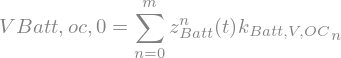

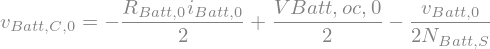

z_{Batt}{\left(t \right)} = z_{Batt,0}
V{Batt,oc,0} = \sum_{n=0}^{m} z_{Batt}^{n}{\left(t \right)} {k_{Batt,V,OC}}_{n}
v_{Batt,C,0} = - \frac{R_{Batt,0} i_{Batt,0}}{2} + \frac{V{Batt,oc,0}}{2} - \frac{v_{Batt,0}}{2 N_{Batt,S}}
v_{Batt,C_1}{\left(t \right)} = v_{Batt,C,0}
v_{Batt,C_2}{\left(t \right)} = v_{Batt,C,0}


In [ ]:
# Initial-condition symbols (given/measured)
batt_z_0, batt_v_0, batt_i_0 = sym.symbols(
    r"z_{Batt\,0} v_{Batt\,0} i_{Batt\,0}",
    real=True
)

# OCV at initial SOC (you can also use the polynomial explicitly if you prefer)
batt_v_oc_0 = sym.symbols(r"V{Batt\,oc\,0}", real=True)

# Common initial polarization voltage:
# v_C1_0 = v_C2_0 = v_C_0
batt_v_C_0 = sym.symbols(r"v_{Batt\,C\,0}", real=True)

# OCV polynomial evaluated at z_0 (equivalent to eval_p_outly(batt_v_oc_coeffs, batt_z_0))
eq_batt_v_oc_0 = sym.Eq(
    batt_v_oc_0,
    sym.Sum(batt_v_oc_coeff[batt_v_oc_k] * sym.Pow(batt_z, batt_v_oc_k), (batt_v_oc_k, 0, batt_v_oc_deg))
)

# From your Python logic:
# v_Batt,cell,0 = OCV_0 - R0 * i_0 - v_C1_0 - v_C2_0
# v_C1_0 = v_C2_0 = v_C_0
# v_Batt,cell,0 = v_Batt,0 / n_s
eq_batt_v_C_0 = sym.Eq(
    batt_v_C_0,
    (batt_v_oc_0 - batt_R0 * batt_i_0 - batt_v_0 / batt_N_S) / 2,
    evaluate=False
)

# Map initial scalars to the state functions (t = 0)
eq_batt_z_0 = sym.Eq(
    batt_z,
    batt_z_0,
    evaluate=False
)
eq_batt_v_C1_0 = sym.Eq(
    batt_v_C1,
    batt_v_C_0,
    evaluate=False
)
eq_batt_v_C2_0 = sym.Eq(
    batt_v_C2,
    batt_v_C_0,
    evaluate=False
)

eqs_batt_0 = [
    eq_batt_z_0,
    eq_batt_v_oc_0,
    eq_batt_v_C_0,
    eq_batt_v_C1_0,
    eq_batt_v_C2_0,
]

[display(eq) for eq in eqs_batt_0]
[print(sym.latex(eq)) for eq in eqs_batt_0];

# Battery-ESC Coupling

In [94]:
# Battery–ESC coupling

# 1) Voltage coupling: ESC input sees battery terminal voltage
eq_esc_v_in2 = sym.Eq(
    esc_v_in, batt_v
)

# Additional bus current from/into other devices on the DC bus
bus_i_others1 = f(r"i_{[...]}", real=True)(t)  # >0: net source into bus; <0: net sink

# 2a) General KCL at DC bus: battery current = ESC current + auxiliary loads
eq_batt_i_kcl = sym.Eq(
    batt_i, esc_i_in + bus_i_others1
)

eqs_batt_esc = [eq_esc_v_in2, eq_batt_i_kcl]

[display(eq) for eq in eqs_batt_esc]
[print(sym.latex(eq)) for eq in eqs_batt_esc];


v_{ESC,in}{\left(t \right)} = v_{Batt}{\left(t \right)}
i_{Batt}{\left(t \right)} = i_{ESC,in}{\left(t \right)} + i_{[...]}{\left(t \right)}


# MPPT Equations

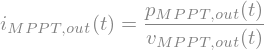

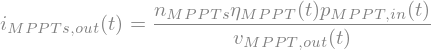

p_{MPPT,in}{\left(t \right)} = i_{MPPT,in}{\left(t \right)} v_{MPPT,in}{\left(t \right)}
p_{MPPT,out}{\left(t \right)} = \eta_{MPPT}{\left(t \right)} p_{MPPT,in}{\left(t \right)}
i_{MPPT,out}{\left(t \right)} = \frac{p_{MPPT,out}{\left(t \right)}}{v_{MPPT,out}{\left(t \right)}}
p_{MPPTs,in}{\left(t \right)} = n_{MPPTs} p_{MPPT,in}{\left(t \right)}
p_{MPPTs,out}{\left(t \right)} = n_{MPPTs} p_{MPPT,out}{\left(t \right)}
i_{MPPTs,out}{\left(t \right)} = n_{MPPTs} i_{MPPT,out}{\left(t \right)}
i_{MPPTs,out}{\left(t \right)} = \frac{n_{MPPTs} \eta_{MPPT}{\left(t \right)} p_{MPPT,in}{\left(t \right)}}{v_{MPPT,out}{\left(t \right)}}


In [95]:
# Functions (single MPPT channel)
mppt_p_in  = f(r"p_{MPPT,in}",  real=True, positive=True)(t)   # Input power (from PV) [W]
mppt_p_out  = f(r"p_{MPPT,out}", real=True, positive=True)(t)   # Output power (to DC bus) [W]
mppt_v_in  = f(r"v_{MPPT,in}",  real=True, positive=True)(t)   # Input voltage (PV terminal) [V]
mppt_v_out  = f(r"v_{MPPT,out}", real=True, positive=True)(t)   # Output voltage (DC bus) [V]
mppt_i_in  = f(r"i_{MPPT,in}",  real=True, positive=True)(t)   # Input current (PV) [A]
mppt_i_out  = f(r"i_{MPPT,out}", real=True, positive=True)(t)   # Output current (bus) [A]
mppt_eta = f(r"\eta_{MPPT}",  real=True, positive=True)(t)   # MPPT efficiency [–]

# Aggregate MPPTs (identical channels in parallel on same bus)
mppts_i_out = f(r"i_{MPPTs,out}", real=True, positive=True)(t)  # Total MPPT output current [A]
mppts_p_out = f(r"p_{MPPTs,out}", real=True, positive=True)(t)  # Total MPPT output power [W]
mppts_p_in = f(r"p_{MPPTs,in}",  real=True, positive=True)(t)  # Total MPPT input power [W]

mppts_N = sym.symbols(
    r"n_{MPPTs}", real=True, constant=True, positive=True
)

# Single-channel relations
eq_mppt_p_in = sym.Eq(
    mppt_p_in, mppt_i_in * mppt_v_in
)
eq_mppt_p_out = sym.Eq(
    mppt_p_out, mppt_eta * mppt_p_in
)
eq_mppt_i_out = sym.Eq(
    mppt_i_out, mppt_p_out / mppt_v_out
)

# Aggregate relations (assuming identical channels, same bus voltage)
eq_mppts_p_in = sym.Eq(
    mppts_p_in, mppts_N * mppt_p_in
)
eq_mppts_p_out = sym.Eq(
    mppts_p_out, mppts_N * mppt_p_out
)
eq_mppts_i_out = sym.Eq(
    mppts_i_out, mppts_N * mppt_i_out
)

# Equivalent total-output-current relation using single-channel expression:
#   I_MPTTs,out = n * (P_MPTT,out / u_bus) = P_MPTTs,out / u_bus
eq_mppts_i_out2 = sym.Eq(
    mppts_i_out, mppts_N * (mppt_p_out / mppt_v_out)
).subs(
    eq_mppt_p_out.lhs, eq_mppt_p_out.rhs
)

eqs_mppt_sys = [
    eq_mppt_p_in,
    eq_mppt_p_out,
    eq_mppt_i_out,
    eq_mppts_p_in,
    eq_mppts_p_out,
    eq_mppts_i_out,
    eq_mppts_i_out2,
]

[display(eq) for eq in eqs_mppt_sys]
[print(sym.latex(eq)) for eq in eqs_mppt_sys];


# MPPT-Battery-ESC Coupling

In [96]:
# Additional bus current from/into other devices on the DC bus
bus_i_others2 = f(r"i_{[...]}", real=True)(t)  # >0: net source into bus; <0: net sink

# MPPT output voltage = battery bus voltage
eq_mppt_v_out_bus = sym.Eq(
    mppt_v_out, batt_v
)

# DC bus KCL (general form with extra term):
#   esc_i_in = batt_i + mppts_i_out + bus_i_owther
eq_esc_i_in_bus_general = sym.Eq(
    esc_i_in, batt_i + mppts_i_out + bus_i_others2
)

eqs_mppt_battery_esc = [eq_mppt_v_out_bus, eq_esc_i_in_bus_general]
[display(eq) for eq in eqs_mppt_battery_esc]
[print(sym.latex(eq)) for eq in eqs_mppt_battery_esc];

v_{MPPT,out}{\left(t \right)} = v_{Batt}{\left(t \right)}
i_{ESC,in}{\left(t \right)} = i_{Batt}{\left(t \right)} + i_{MPPTs,out}{\left(t \right)} + i_{[...]}{\left(t \right)}


# Solar Panel Equations

Note: This is a simplified model ignoring the diode effect.

In [97]:
# Solar Panel Equations (simplified, no diode / I–V curve)

# Power Functions (single equivalent PV panel or string)
pv_p_in  = f(r"p_{PV,in}",  real=True, positive=True)(t)   # Incident solar power on PV [W]
pv_p_out  = f(r"p_{PV,out}", real=True, positive=True)(t)   # Electrical output power [W]
pv_v_out  = f(r"v_{PV,out}", real=True, positive=True)(t)   # PV output voltage (MPPT input) [V]
pv_i_out  = f(r"i_{PV,out}", real=True, positive=True)(t)   # PV output current [A]
pv_g   = f(r"g_{PV}",     real=True, positive=True)(t)   # Plane-of-array irradiance [W/m^2]
pv_eta = f(r"\eta_{PV}",  real=True, positive=True)(t)   # PV efficiency (η = P_out / P_in) [–]

# Geometry
pv_S = sym.symbols(r"S_{PV}", real=True, constant=True, positive=True)

# Single-panel relations
eq_pv_p_in = sym.Eq(
    pv_p_in, pv_g * pv_S
)
eq_pv_p_out = sym.Eq(
    pv_p_out, pv_eta * pv_p_in
)
eq_pv_p_out2 = sym.Eq(
    pv_p_out, pv_v_out * pv_i_out
)

# Multiple panels (identical, aggregated as one equivalent source)
pvs_N  = sym.symbols(r"n_{PVs}", real=True, constant=True, positive=True)

pvs_p_in = f(r"p_{PVs,in}",  real=True, positive=True)(t)  # Total incident power on all PVs [W]
pvs_p_out = f(r"p_{PVs,out}", real=True, positive=True)(t)  # Total electrical output power [W]
pvs_i_out = f(r"i_{PVs,out}", real=True, positive=True)(t)  # Total output current [A]

# Aggregated relations (assuming same irradiance and identical modules)
eq_pvs_p_in = sym.Eq(
    pvs_p_in, pvs_N * pv_p_in
)
eq_pvs_p_out = sym.Eq(
    pvs_p_out, pvs_N * pv_p_out
)
eq_pvs_i_out = sym.Eq(
    pvs_i_out, pvs_N * pv_i_out
)

eqs_pv_sys = [
    eq_pv_p_in,
    eq_pv_p_out,
    eq_pv_p_out2,
    eq_pvs_p_in,
    eq_pvs_p_out,
    eq_pvs_i_out,
]

[display(eq) for eq in eqs_pv_sys]
[print(sym.latex(eq)) for eq in eqs_pv_sys];

p_{PV,in}{\left(t \right)} = S_{PV} g_{PV}{\left(t \right)}
p_{PV,out}{\left(t \right)} = \eta_{PV}{\left(t \right)} p_{PV,in}{\left(t \right)}
p_{PV,out}{\left(t \right)} = i_{PV,out}{\left(t \right)} v_{PV,out}{\left(t \right)}
p_{PVs,in}{\left(t \right)} = n_{PVs} p_{PV,in}{\left(t \right)}
p_{PVs,out}{\left(t \right)} = n_{PVs} p_{PV,out}{\left(t \right)}
i_{PVs,out}{\left(t \right)} = n_{PVs} i_{PV,out}{\left(t \right)}


# Solar Panel-MPPT Coupling

In [98]:
# One PV → one MPPT

# Voltage and current coupling
eq_mppt_v_in = sym.Eq(
    mppt_v_in, pv_v_out
)
eq_mppt_i_in = sym.Eq(
    mppt_i_in, pv_i_out
)

# Single PV–MPPT coupling
eq_mppt_p_in_cpl = sym.Eq(mppt_p_in, pv_p_out)           # p_MPPT,in = p_PV,out

# One MPPT per PV: number of PVs = number of MPPTs
eq_pvs_pvs_n = sym.Eq(
    pvs_N, mppts_N
)

# # Aggregate output current
# eq_mppts_i_out2 = eq_mppts_i_out.subs(
#     eq_pvs_pvs_n.rhs, eq_pvs_pvs_n.lhs
# )

# # Total MPPT output power:
# eq_mppts_p_out2 = eq_mppts_p_out.subs(
#     eq_pvs_pvs_n.rhs, eq_pvs_pvs_n.lhs
# )

eqs_mppt_battery_esc = [eq_mppt_v_in, eq_mppt_i_in, eq_mppt_p_in, eq_mppt_p_out, eq_pvs_pvs_n]
[display(eq) for eq in eqs_mppt_battery_esc]
[print(sym.latex(eq)) for eq in eqs_mppt_battery_esc];

v_{MPPT,in}{\left(t \right)} = v_{PV,out}{\left(t \right)}
i_{MPPT,in}{\left(t \right)} = i_{PV,out}{\left(t \right)}
p_{MPPT,in}{\left(t \right)} = i_{MPPT,in}{\left(t \right)} v_{MPPT,in}{\left(t \right)}
p_{MPPT,out}{\left(t \right)} = \eta_{MPPT}{\left(t \right)} p_{MPPT,in}{\left(t \right)}
n_{PVs} = n_{MPPTs}


# Other loads' equations

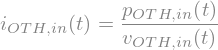

i_{OTH,in}{\left(t \right)} = \frac{p_{OTH,in}{\left(t \right)}}{v_{OTH,in}{\left(t \right)}}


In [99]:
# Generic "other" DC loads/sources on the bus

others_p_in = f(r"p_{OTH,in}", real=True, positive=True)(t)  # Electrical power into OTHER block [W]
others_v_in = f(r"v_{OTH,in}", real=True, positive=True)(t)  # Voltage at OTHER block terminals [V]
others_i_in = f(r"i_{OTH,in}", real=True, positive=True)(t)  # Current into OTHER block [A]

# Power relation: p = v * i
eq_others_i_in = sym.Eq(
    others_i_in, others_p_in / others_v_in
)

display(eq_others_i_in)
print(sym.latex(eq_others_i_in))

# Other loads'-Battery Coupling

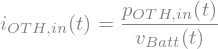

v_{OTH,in}{\left(t \right)} = v_{Batt}{\left(t \right)}
i_{OTH,in}{\left(t \right)} = \frac{p_{OTH,in}{\left(t \right)}}{v_{Batt}{\left(t \right)}}


In [100]:
# Coupling: OTHER block is connected to the battery DC bus

eq_others_v_in = sym.Eq(
    others_v_in, batt_v
)

# Substitute v_{OTH,in} = v_{Batt} into the power relation
eq_others_i_in2 = eq_others_i_in.replace(
    eq_others_v_in.lhs, eq_others_v_in.rhs
)

eqs_mppt_battery_esc = [eq_others_v_in, eq_others_i_in2]
[display(eq) for eq in eqs_mppt_battery_esc]
[print(sym.latex(eq)) for eq in eqs_mppt_battery_esc];

# Solving Battery node

In [101]:
eq_batt_i = sym.Eq(batt_i, (others_i_in + esc_i_in) - mppts_i_out)

eqs_mppt_battery_esc = [eq_batt_i]
[display(eq) for eq in eqs_mppt_battery_esc];
[print(sym.latex(eq)) for eq in eqs_mppt_battery_esc];

i_{Batt}{\left(t \right)} = i_{ESC,in}{\left(t \right)} - i_{MPPTs,out}{\left(t \right)} + i_{OTH,in}{\left(t \right)}


### Solving MPPTs Output Current

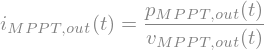

--


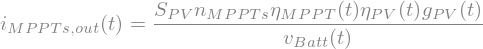

i_{MPPTs,out}{\left(t \right)} = \frac{S_{PV} n_{MPPTs} \eta_{MPPT}{\left(t \right)} \eta_{PV}{\left(t \right)} g_{PV}{\left(t \right)}}{v_{Batt}{\left(t \right)}}


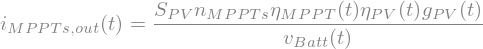

In [ ]:
display(eq_mppts_i_out)
display(eq_mppt_i_out)
display(eq_mppt_p_out)
display(eq_mppt_p_in)
display(eq_pv_p_out)
display(eq_pv_p_in)
display(eq_mppt_v_out_bus)

print('--')

eq = eq_mppts_i_out

# mppt_i_out -> mppt_p_out / mppt_v_out
eq = eq.subs(eq_mppt_i_out.lhs, eq_mppt_i_out.rhs)

# mppt_p_out -> mppt_eta * mppt_p_in
eq = eq.subs(eq_mppt_p_out.lhs, eq_mppt_p_out.rhs)

# mppt_p_in -> pv_p_out  (PV–MPPT coupling)
eq = eq.subs(eq_mppt_p_in_cpl.lhs, eq_mppt_p_in_cpl.rhs)

# pv_p_out -> pv_eta * pv_p_in
eq = eq.subs(eq_pv_p_out.lhs, eq_pv_p_out.rhs)

# pv_p_in -> pv_g * pv_S
eq = eq.subs(eq_pv_p_in.lhs, eq_pv_p_in.rhs)

# mppt_v_out -> batt_v (bus voltage)
eq = eq.subs(eq_mppt_v_out_bus.lhs, eq_mppt_v_out_bus.rhs)

eq_mppts_i_out2 = sym.simplify(eq)
display(eq_mppts_i_out2)
print(sym.latex(eq_mppts_i_out2))

display(eq_mppts_i_out2)

### Solving ESC Input Current

\eta_{ESC}{\left(t \right)} i_{ESC,in}{\left(t \right)} v_{ESC,in}{\left(t \right)} = d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)} v_{ESC,in}{\left(t \right)}


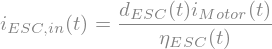

i_{ESC,in}{\left(t \right)} = \frac{d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)}}{\eta_{ESC}{\left(t \right)}}


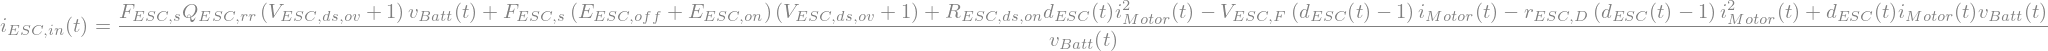

i_{ESC,in}{\left(t \right)} = \frac{F_{ESC,s} Q_{ESC,rr} \left(V_{ESC,ds,ov} + 1\right) v_{Batt}{\left(t \right)} + F_{ESC,s} \left(E_{ESC,off} + E_{ESC,on}\right) \left(V_{ESC,ds,ov} + 1\right) + R_{ESC,ds,on} d_{ESC}{\left(t \right)} i_{Motor}^{2}{\left(t \right)} - V_{ESC,F} \left(d_{ESC}{\left(t \right)} - 1\right) i_{Motor}{\left(t \right)} - r_{ESC,D} \left(d_{ESC}{\left(t \right)} - 1\right) i_{Motor}^{2}{\left(t \right)} + d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)} v_{Batt}{\left(t \right)}}{v_{Batt}{\left(t \right)}}


In [103]:
display(eq_esc_p_in)
display(eq_esc_p_out)
display(eq_esc_p_out2)
display(eq_esc_v_out)
display(eq_esc_motor_current)

eq = eq_esc_p_out2    # esc_p_out = esc_eta * esc_p_in

# esc_p_out -> esc_i_out * esc_v_out
eq = eq.subs(eq_esc_p_out.lhs, eq_esc_p_out.rhs)

# esc_p_in -> esc_i_in * esc_v_in
eq = eq.subs(eq_esc_p_in.lhs, eq_esc_p_in.rhs)

# esc_v_out -> esc_d * esc_v_in
eq = eq.subs(eq_esc_v_out.lhs, eq_esc_v_out.rhs)

# esc_i_out -> motor_i
eq = eq.subs(eq_esc_motor_current.rhs, eq_esc_motor_current.lhs)

# Now we have: esc_d * esc_v_in * motor_i = esc_eta * esc_v_in * esc_i_in
eq_esc_p_outwer_balance = sym.simplify(eq)
display(eq_esc_p_outwer_balance)
print(sym.latex(eq_esc_p_outwer_balance))

# Solve for esc_i_in
eq_esc_i_in2 = sym.Eq(
    esc_i_in,
    sym.simplify(sym.solve(eq_esc_p_outwer_balance, esc_i_in)[0])
)
display(eq_esc_i_in2)
print(sym.latex(eq_esc_i_in2))

eq_esc_eta6 = eq_esc_eta5.subs({
    eq_esc_motor_current.rhs: eq_esc_motor_current.lhs,  # esc_i_out -> motor_i
    eq_esc_v_out.lhs: eq_esc_v_out.rhs,                        # esc_v_out -> esc_d*esc_v_in
}).subs({
    eq_esc_v_in2.lhs: eq_esc_v_in2.rhs,                      # esc_v_in -> batt_v
})

eq_esc_i_in3 = eq_esc_i_in2.subs({
    eq_esc_eta6.lhs: eq_esc_eta6.rhs,
}).simplify()

display(eq_esc_i_in3)
print(sym.latex(eq_esc_i_in3))

# Solving Battery voltage

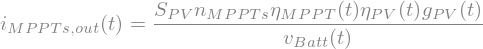

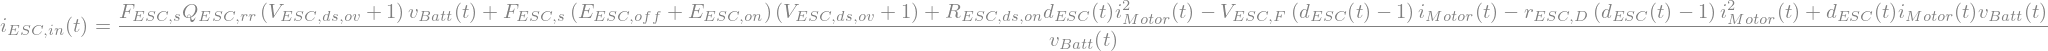

In [104]:
display(eq_batt_v)
display(eq_batt_i)
display(eq_mppts_i_out2)
display(eq_esc_i_in3)

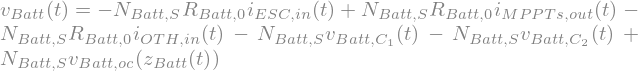

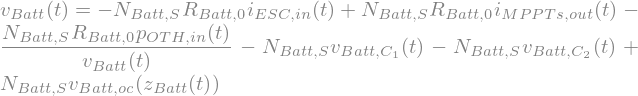

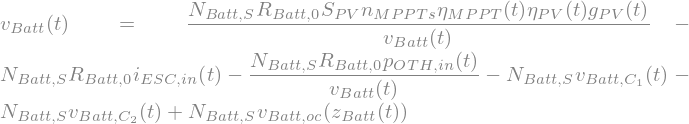

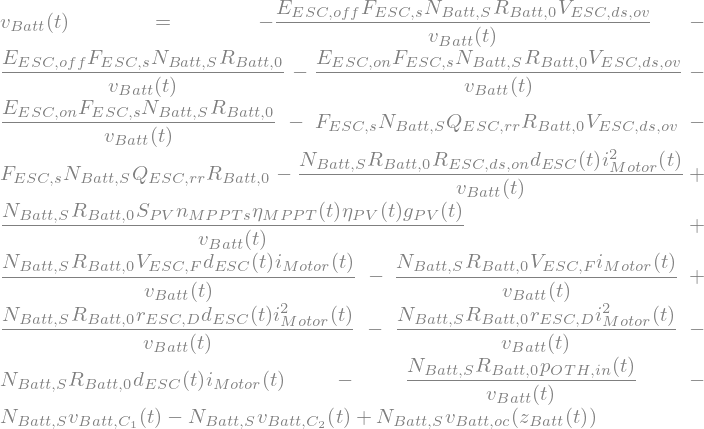

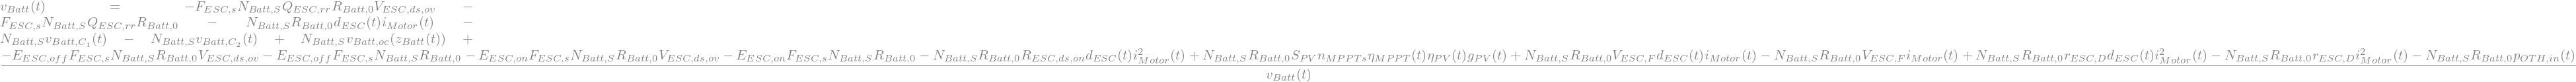

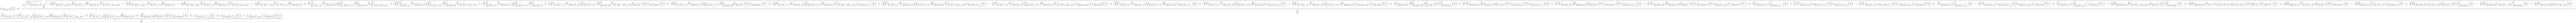

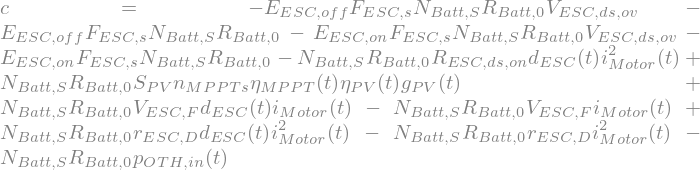

c = - E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov} - E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} - E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov} - E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} - N_{Batt,S} R_{Batt,0} R_{ESC,ds,on} d_{ESC}{\left(t \right)} i_{Motor}^{2}{\left(t \right)} + N_{Batt,S} R_{Batt,0} S_{PV} n_{MPPTs} \eta_{MPPT}{\left(t \right)} \eta_{PV}{\left(t \right)} g_{PV}{\left(t \right)} + N_{Batt,S} R_{Batt,0} V_{ESC,F} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)} - N_{Batt,S} R_{Batt,0} V_{ESC,F} i_{Motor}{\left(t \right)} + N_{Batt,S} R_{Batt,0} r_{ESC,D} d_{ESC}{\left(t \right)} i_{Motor}^{2}{\left(t \right)} - N_{Batt,S} R_{Batt,0} r_{ESC,D} i_{Motor}^{2}{\left(t \right)} - N_{Batt,S} R_{Batt,0} p_{OTH,in}{\left(t \right)}


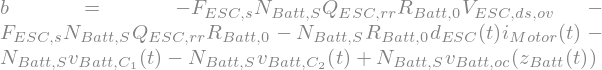

b = - F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0} V_{ESC,ds,ov} - F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0} - N_{Batt,S} R_{Batt,0} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)} - N_{Batt,S} v_{Batt,C_1}{\left(t \right)} - N_{Batt,S} v_{Batt,C_2}{\left(t \right)} + N_{Batt,S} v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)}


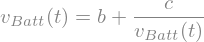

v_{Batt}{\left(t \right)} = b + \frac{c}{v_{Batt}{\left(t \right)}}


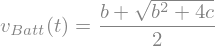

v_{Batt}{\left(t \right)} = \frac{b + \sqrt{b^{2} + 4 c}}{2}


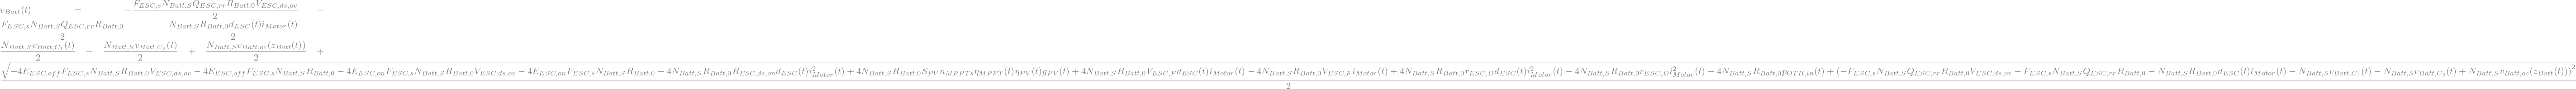

v_{Batt}{\left(t \right)} = - \frac{F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0} V_{ESC,ds,ov}}{2} - \frac{F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0}}{2} - \frac{N_{Batt,S} R_{Batt,0} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)}}{2} - \frac{N_{Batt,S} v_{Batt,C_1}{\left(t \right)}}{2} - \frac{N_{Batt,S} v_{Batt,C_2}{\left(t \right)}}{2} + \frac{N_{Batt,S} v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)}}{2} + \frac{\sqrt{- 4 E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov} - 4 E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} - 4 E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov} - 4 E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} - 4 N_{Batt,S} R_{Batt,0} R_{ESC,ds,on} d_{ESC}{\left(t \right)} i_{Motor}^{2}{\left(t \right)} + 4 N_{Batt,S} R_{Batt,0} S_{PV} n_{MPPTs} \eta_{MPPT}{\left(t \right)} \eta_{PV}{\left(t \right)} g_{PV}{\left(t \right)} + 4 N_{Batt,S} R_{Batt,0} V_{ESC,F} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)} - 4 N_{Batt,S} R_{Batt,0} V_{ESC,F} i_{Mo

In [105]:
display(eq_batt_v)
eq = eq_batt_v
eq = eq.subs(eq_batt_i.lhs, eq_batt_i.rhs).expand()
display(eq)
eq = eq.subs(eq_others_i_in2.lhs, eq_others_i_in2.rhs).expand()
display(eq)
eq = eq.subs(eq_mppts_i_out2.lhs, eq_mppts_i_out2.rhs).expand()
display(eq)
eq = eq.subs(eq_esc_i_in3.lhs, eq_esc_i_in3.rhs).expand()
display(eq)
eq = sym.Eq(eq.lhs, eq.rhs.simplify().expand().collect(batt_v))
display(eq)
# print(sym.latex(eq))

# We can solve it directly, but the result is not pretty
eq_batt_v2 = sym.Eq(
    batt_v,
    sym.solve(eq, batt_v)[1]
)
display(eq_batt_v2)

# To have a simpler final form, we first transform it to a simpler form:
a, b, c = sym.symbols('a b c', real=True)
# terms = eq.rhs.as_owrdered_terms()
coeffs = eq.rhs.as_coefficients_dict(batt_v)
# display(coeffs)
# The form is `x = b**0 + c**-1`
eq_c = sym.Eq(c, coeffs[batt_v**(-1)])
display(eq_c)
print(sym.latex(eq_c))
eq_b = sym.Eq(b, coeffs[batt_v**0])
display(eq_b)
print(sym.latex(eq_b))

eq = eq.subs(eq_c.rhs, eq_c.lhs)
eq = eq.subs(eq_b.rhs, eq_b.lhs)
display(eq)
print(sym.latex(eq))

# Then we can solve it normally
eq_batt_simple = sym.Eq(
    batt_v,
    sym.polys.polytools.factor(
        sym.solve(eq, batt_v)[1]
    ),
)
display(eq_batt_simple)
print(sym.latex(eq_batt_simple))

# And then, we replace back to the original variables:
eq_batt_v3 = eq_batt_simple.subs(eq_c.lhs, eq_c.rhs).subs(eq_b.lhs, eq_b.rhs)
display(eq_batt_v3)
print(sym.latex(eq_batt_v3))

# Check if this maneuvar is mathematically correct:
if not eq_batt_v2.rhs.equals(eq_batt_v3.rhs):
    raise ValueError('Wrong substitution')

In [106]:
def check_equal(Expr1, Expr2):  # Inspired by: https://stackoverflow.com/a/65256160
    import numpy as np
    import sympy as sym

    def flatten(a):
        out = []
        for sublist in a:
            out.extend(sublist)
        return out

    if Expr1 == None or Expr2 == None:
        return False
    if Expr1.free_symbols != Expr2.free_symbols:
        return False
    if Expr1.equals(Expr2):
        return True

    # Define values to replace for functions
    functions = list(eq_batt_v2.atoms(sym.Function))
    unique_args = list(set(flatten([list(function.args) for function in functions])))
    functions = [function for function in functions if not any(function is arg for arg in unique_args)]

    # Define values to replace for constants
    constants = list(Expr1.free_symbols)
    constants = [constant for constant in constants if not any(constant is arg for arg in unique_args)]

    symbols = constants + functions
    values = np.random.random(len(symbols))

    # Run the replacement
    Expr1_num = Expr1.subs(zip(symbols, values))
    Expr2_num = Expr2.subs(zip(symbols, values))

    Expr1_num = np.complex128(Expr1_num)
    Expr2_num = np.complex128(Expr2_num)

    if not np.allclose(Expr1_num, Expr2_num):
        return False

    if Expr1.equals(Expr2):
        return True

    return False

check_equal(eq_batt_v2.rhs, eq_batt_v3.rhs)

True

In [107]:
def split_into_parts(expr, base_sym):
    """
    Split expr into base_sym_0, base_sym_1, ... in a fixed order.
    Returns:
        part_syms: [b_0, b_1, ...]
        part_eqs:  [Eq(b_0, term0), Eq(b_1, term1), ...]
    """
    expr = sym.simplify(expr)
    terms = sym.expand(expr).as_ordered_terms()  # consistent deterministic order

    part_syms = []
    part_eqs = []
    for i, t in enumerate(terms):
        s = sym.Symbol(f"{base_sym.name}_{i}")
        part_syms.append(s)
        part_eqs.append(sym.Eq(s, t))
    return part_syms, part_eqs

def sum_equation_latex(base_sym, part_syms):
    """
    Build 'base_sym = part_0 + part_1 + ...' in LaTeX,
    in *exactly* the order of part_syms.
    """
    lhs = sym.latex(base_sym)
    rhs = " + ".join(sym.latex(s) for s in part_syms)
    return f"{lhs} = {rhs}"

# Split b and c
b_syms, b_parts = split_into_parts(eq_b.rhs, b)
c_syms, c_parts = split_into_parts(eq_c.rhs, c)

# Build LaTeX for the "sum" equations with correct visual order
b_total_latex = sum_equation_latex(b, b_syms)
c_total_latex = sum_equation_latex(c, c_syms)

print(sym.latex(eq_batt_simple))

print(b_total_latex)
for eq in b_parts:
    print(sym.latex(eq))

print(c_total_latex)
for eq in c_parts:
    print(sym.latex(eq))

v_{Batt}{\left(t \right)} = \frac{b + \sqrt{b^{2} + 4 c}}{2}
b = b_{0} + b_{1} + b_{2} + b_{3} + b_{4} + b_{5}
b_{0} = - F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0} V_{ESC,ds,ov}
b_{1} = - F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0}
b_{2} = - N_{Batt,S} R_{Batt,0} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)}
b_{3} = - N_{Batt,S} v_{Batt,C_1}{\left(t \right)}
b_{4} = - N_{Batt,S} v_{Batt,C_2}{\left(t \right)}
b_{5} = N_{Batt,S} v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)}
c = c_{0} + c_{1} + c_{2} + c_{3} + c_{4} + c_{5} + c_{6} + c_{7} + c_{8} + c_{9} + c_{10}
c_{0} = - E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov}
c_{1} = - E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0}
c_{2} = - E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov}
c_{3} = - E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0}
c_{4} = - N_{Batt,S} R_{Batt,0} R_{ESC,ds,on} d_{ESC}{\left(t \right)} i_{Motor}^{2}{\left(t \right)}
c_{5} = N_{Batt,S} R_{Batt,0} S_{PV} n_{MPPTs} \eta_{MPPT}{\left(t \right)} 

# Solar Boat Model Equations

In [ ]:
inputs = [
    # From PV:
    pv_g,

    # From ESC:
    pilot_d,
]
display('Inputs:', inputs)

states = [
    # From Battery:
    batt_v_C1,
    batt_v_C2,
    batt_z,

    # From Motor:
    motor_i,
    motor_w,

    # From ESC:
    esc_d,

    # From Hull:
    hull_u,
]
display('States', states)

outputs = [
    # From Battery:
    batt_v,
    
    # From MPPT:
    # mppt_i_in,  # Disabled: our simplified PV model doesn't allow it
    # mppt_v_in,  # Disabled: our simplified PV model doesn't allow it
    mppts_i_out,

    # From motor:
    motor_w,

    # From ESC:
    esc_i_in,
    esc_d,

    # From Hull:
    hull_u,
]
display('Outputs', outputs)

parameters = [
    # From Propeller:
    rho_water,  # Water density [kg/m^3]
    prop_D,     # Propeller diameter [m]
    prop_I_rr,    # Propeller rotational inertia [kg*m^2]
    prop_M,     # Propeller total mass [kg]
    prop_S,     # Propeller disk area [m^2]
    prop_k_t_ow_coeffs,
    prop_k_q_ow_coeffs,

    # From Hull:
    rho_air,        # Air density [kg/m³]
    hull_S_water,   # Wetted surface area in contact with water [m^2]
    hull_S_air,     # Projected or exposed surface area in contact with air [m^2]
    hull_C_T,         # Total resistance coefficient combining water and air effects
    hull_M,         # Fully loaded hull mass [kg]
    hull_M_a,       # Hull hydrodynamic "added" mass [kg]

    # From Propeller-Hull Coupling:
    prop_eta_R,  # Propeller rotative efficiency
    hull_W,      # Hull wake fraction
    hull_T_ded,  # Hull thrust deductive fraction

    # From Transmission:
    trans_k,         # Speed ratio: k = ω_out / ω_in  (k > 1 ⇒ speed increase; k < 1 ⇒ reduction) [–]
    trans_I_r_out,       # Rotational inertia of transmission output shaft about its axis [kg·m²]
    trans_I_r_in,       # Rotational inertia of transmission input shaft about its axis [kg·m²]
    trans_I_r_out_load,  # Inertia of external load (e.g., propeller) attached to transmission output [kg·m²]
    trans_I_r_in_equiv, # Total equivalent inertia reflected to input shaft: Ir_in + k² (Ir_out + Ir_out_load) [kg·m²]
    trans_eta,       # Transmission efficiency

    # From Motor:
    motor_R_A,     # Armature resistance [Ω]
    motor_L_A,     # Armature inductance [H]
    motor_K_Q,     # Torque constant K_t [N·m/A]
    motor_K_V,     # Back-EMF constant K_e [V·s/rad]
    motor_I_r,      # Rotor inertia [kg·m²]
    motor_B,       # Viscous friction [N·m·s/rad]

    # From ESC:
    esc_Fs,        # Switching frequency [Hz]
    esc_Vds_ov,    # Fractional Vds overshoot
    esc_Rds_on,    # MOSFET Rds(on) [Ω]
    esc_E_on,      # Turn-on energy [J]
    esc_E_off,     # Turn-off energy [J]
    esc_V_F,       # Diode forward drop [V]
    esc_r_D,       # Diode dynamic resistance [Ω]
    esc_Qrr,       # Diode reverse-recovery charge [C]
    esc_tau_rise,  # Duty-cycle first-order lag rise time constant
    esc_tau_fall,  # Duty-cycle first-order lag fall time constant

    # From Battery:
    batt_R1,      # Polarization resistance of RC branch 1 [Ω]
    batt_C1,      # Polarization capacitance of RC branch 1 [F]
    batt_R2,      # Polarization resistance of RC branch 2 [Ω]
    batt_C2,      # Polarization capacitance of RC branch 2 [F]
    batt_R0,      # Ohmic (internal) resistance [Ω]
    batt_Q,       # Nominal capacity [A·s]
    batt_N_S,     # Cells in series [–]
    batt_eta,
    # batt_eta_ch,  # Battery charge efficiency
    # batt_eta_dis, # Battery discharge efficiency
    batt_v_oc_coeffs, 

    # From MPPT:
    mppts_N,       # Number of MPPTs
    mppt_eta,      # MPPT efficiency [–]

    # From PV:
    pvs_N,       # Number of PVs
    pv_eta,      # PV efficiency [–]
    pv_S,     # PV surface area [m²]

    # From Other loads:
    others_p_in,
]
display('Parameters:', parameters)

'Inputs:'

'States'

'Outputs'

'Parameters:'

'Auxiliar Equations:'

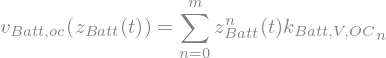

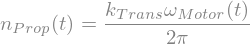

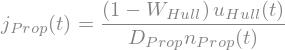

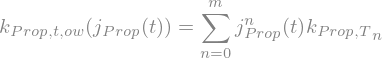

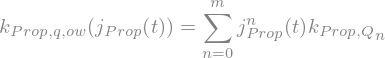

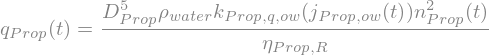

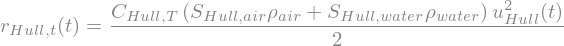

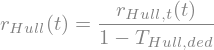

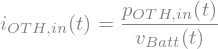

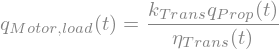

In [109]:
eq_motor_v2 = eq_motor_v.subs({
    eq_esc_v_in2.lhs: eq_esc_v_in2.rhs,
})

eq_prop_w_from_motor = eq_prop_w_from_trans_input.subs({
    eq_trans_w_in.lhs: eq_trans_w_in.rhs,
})

eq_prop_n2 = eq_prop_n.subs({
    eq_prop_w_from_motor.lhs: eq_prop_w_from_motor.rhs,
})

eq_prop_t2 = eq_prop_t.subs({
    eq_prop_t_ow.lhs: eq_prop_t_ow.rhs,
})

eq_prop_q2 = eq_prop_q.subs({
    eq_prop_q_ow.lhs: eq_prop_q_ow.rhs,
})

eq_prop_j2 = eq_prop_j.subs({
    eq_prop_u.lhs: eq_prop_u.rhs,
})

eqs_auxiliar = [
    eq_batt_v_oc,
    eq_batt_i,
    eq_motor_I_r_load,
    eq_motor_v2,
    eq_prop_n2,
    eq_prop_j2,
    eq_prop_k_t_ow2,
    eq_prop_k_q_ow2,
    eq_prop_t2,
    eq_prop_q2,
    eq_hull_r_t,
    eq_hull_r_ded,
    eq_others_i_in2,
    eq_motor_q_load_prop,
]
auxiliars = [aux.lhs for aux in eqs_auxiliar]
display(auxiliars)

display('Auxiliar Equations:')
[display(eq) for eq in eqs_auxiliar];


'State Equations:'

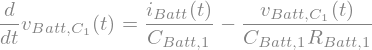

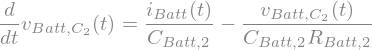

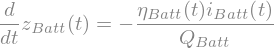

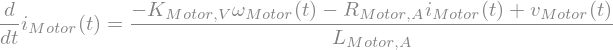

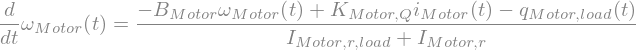

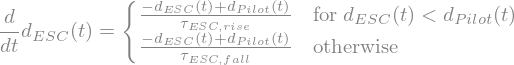

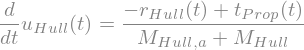

In [110]:
eqs_states = [
    eq_batt_dvc1dt,
    eq_batt_dvc2dt,
    eq_batt_dzdt,
    eq_motor_didt,
    eq_motor_dwdt,
    eq_esc_dddt,
    eq_hull_dudt2,
]
display('State Equations:')
[display(eq) for eq in eqs_states];

'Output Equations:'

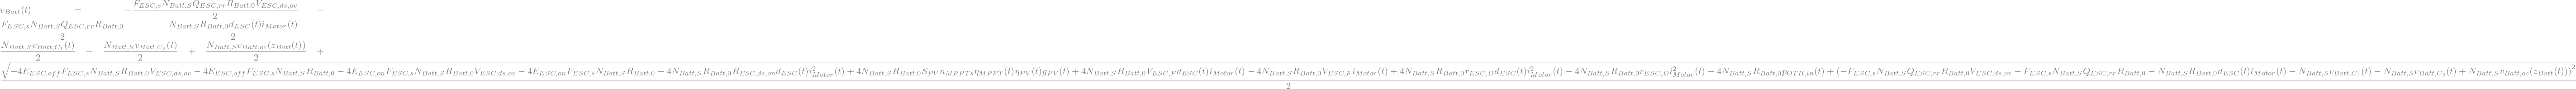

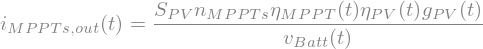

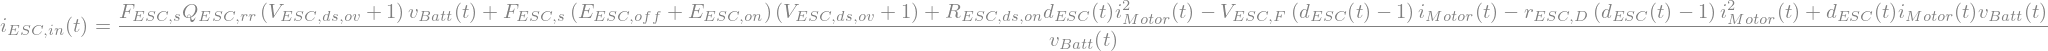

In [111]:
eqs_outputs = [
    eq_batt_v3,
    # eq_mppt_i_in,
    # eq_mppt_v_in,
    eq_mppts_i_out2,
    eq_esc_i_in3,
]
display('Output Equations:')
[display(eq) for eq in eqs_outputs];

'Initial Conditions:'

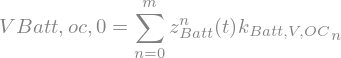

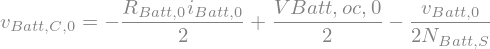

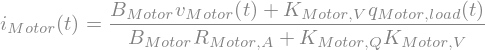

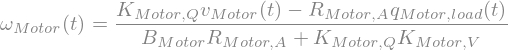

In [112]:
eqs_initial_conditions = eqs_batt_0 + eqs_motor_0 + eqs_esc_0 + eqs_hull_0
display('Initial Conditions:')
[display(eq) for eq in eqs_initial_conditions];

In [113]:
# Quick verification whether we missed any symbols for what we've chosen as system

ignored_symbols = [t, pi, batt_v_oc_k, batt_v_oc_coeff.label, prop_k_t_ow_k, prop_k_t_ow_deg, prop_k_q_ow_k, prop_k_q_ow_deg, prop_k_t_ow_coeff.label, prop_k_q_ow_coeff.label]

atoms = []
for eq in eqs_outputs + eqs_states + eqs_auxiliar:
    atoms += eq.atoms(sym.Symbol)
atoms = set(atoms)

missing_atoms = []
for atom in atoms:
    if atom not in set(outputs + inputs + states + auxiliars + parameters + ignored_symbols):
        missing_atoms.append(atom)
missing_atoms = set(missing_atoms)

print(missing_atoms)

assert not len(missing_atoms)

set()


In [114]:
display('Initial Conditions:')
[display(sym.latex(eq)) for eq in eqs_initial_conditions];

display('States:')
[print(sym.latex(eq)) for eq in eqs_states];

display('Outputs:')
[print(sym.latex(eq)) for eq in eqs_outputs];

display('Auxiliar Equations:')
[print(sym.latex(eq)) for eq in eqs_auxiliar];

display('Initial Conditions:')
[print(sym.latex(eq)) for eq in eqs_initial_conditions];

'Initial Conditions:'

'z_{Batt}{\\left(t \\right)} = z_{Batt,0}'

'V{Batt,oc,0} = \\sum_{n=0}^{m} z_{Batt}^{n}{\\left(t \\right)} {k_{Batt,V,OC}}_{n}'

'v_{Batt,C,0} = - \\frac{R_{Batt,0} i_{Batt,0}}{2} + \\frac{V{Batt,oc,0}}{2} - \\frac{v_{Batt,0}}{2 N_{Batt,S}}'

'v_{Batt,C_1}{\\left(t \\right)} = v_{Batt,C,0}'

'v_{Batt,C_2}{\\left(t \\right)} = v_{Batt,C,0}'

'i_{Motor}{\\left(t \\right)} = \\frac{B_{Motor} v_{Motor}{\\left(t \\right)} + K_{Motor,V} q_{Motor,load}{\\left(t \\right)}}{B_{Motor} R_{Motor,A} + K_{Motor,Q} K_{Motor,V}}'

'\\omega_{Motor}{\\left(t \\right)} = \\frac{K_{Motor,Q} v_{Motor}{\\left(t \\right)} - R_{Motor,A} q_{Motor,load}{\\left(t \\right)}}{B_{Motor} R_{Motor,A} + K_{Motor,Q} K_{Motor,V}}'

'd_{ESC}{\\left(t \\right)} = d_{Pilot}{\\left(t \\right)}'

'u_{Hull}{\\left(t \\right)} = u_{Hull,0}'

'r_{Hull}{\\left(t \\right)} = t_{Hull}{\\left(t \\right)}'

'States:'

\frac{d}{d t} v_{Batt,C_1}{\left(t \right)} = \frac{i_{Batt}{\left(t \right)}}{C_{Batt,1}} - \frac{v_{Batt,C_1}{\left(t \right)}}{C_{Batt,1} R_{Batt,1}}
\frac{d}{d t} v_{Batt,C_2}{\left(t \right)} = \frac{i_{Batt}{\left(t \right)}}{C_{Batt,2}} - \frac{v_{Batt,C_2}{\left(t \right)}}{C_{Batt,2} R_{Batt,2}}
\frac{d}{d t} z_{Batt}{\left(t \right)} = - \frac{\eta_{Batt}{\left(t \right)} i_{Batt}{\left(t \right)}}{Q_{Batt}}
\frac{d}{d t} i_{Motor}{\left(t \right)} = \frac{- K_{Motor,V} \omega_{Motor}{\left(t \right)} - R_{Motor,A} i_{Motor}{\left(t \right)} + v_{Motor}{\left(t \right)}}{L_{Motor,A}}
\frac{d}{d t} \omega_{Motor}{\left(t \right)} = \frac{- B_{Motor} \omega_{Motor}{\left(t \right)} + K_{Motor,Q} i_{Motor}{\left(t \right)} - q_{Motor,load}{\left(t \right)}}{I_{Motor,r,load} + I_{Motor,r}}
\frac{d}{d t} d_{ESC}{\left(t \right)} = \begin{cases} \frac{- d_{ESC}{\left(t \right)} + d_{Pilot}{\left(t \right)}}{\tau_{ESC,rise}} & \text{for}\: d_{ESC}{\left(t \right)} < d_{Pilot}{\left(

'Outputs:'

v_{Batt}{\left(t \right)} = - \frac{F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0} V_{ESC,ds,ov}}{2} - \frac{F_{ESC,s} N_{Batt,S} Q_{ESC,rr} R_{Batt,0}}{2} - \frac{N_{Batt,S} R_{Batt,0} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)}}{2} - \frac{N_{Batt,S} v_{Batt,C_1}{\left(t \right)}}{2} - \frac{N_{Batt,S} v_{Batt,C_2}{\left(t \right)}}{2} + \frac{N_{Batt,S} v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)}}{2} + \frac{\sqrt{- 4 E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov} - 4 E_{ESC,off} F_{ESC,s} N_{Batt,S} R_{Batt,0} - 4 E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} V_{ESC,ds,ov} - 4 E_{ESC,on} F_{ESC,s} N_{Batt,S} R_{Batt,0} - 4 N_{Batt,S} R_{Batt,0} R_{ESC,ds,on} d_{ESC}{\left(t \right)} i_{Motor}^{2}{\left(t \right)} + 4 N_{Batt,S} R_{Batt,0} S_{PV} n_{MPPTs} \eta_{MPPT}{\left(t \right)} \eta_{PV}{\left(t \right)} g_{PV}{\left(t \right)} + 4 N_{Batt,S} R_{Batt,0} V_{ESC,F} d_{ESC}{\left(t \right)} i_{Motor}{\left(t \right)} - 4 N_{Batt,S} R_{Batt,0} V_{ESC,F} i_{Mo

'Auxiliar Equations:'

v_{Batt,oc}{\left(z_{Batt}{\left(t \right)} \right)} = \sum_{n=0}^{m} z_{Batt}^{n}{\left(t \right)} {k_{Batt,V,OC}}_{n}
i_{Batt}{\left(t \right)} = i_{ESC,in}{\left(t \right)} - i_{MPPTs,out}{\left(t \right)} + i_{OTH,in}{\left(t \right)}
I_{Motor,r,load} = I_{Trans,r,in} + k_{Trans}^{2} \left(I_{Prop,r} + I_{Trans,r,out}\right)
v_{Motor}{\left(t \right)} = d_{ESC}{\left(t \right)} v_{Batt}{\left(t \right)}
n_{Prop}{\left(t \right)} = \frac{k_{Trans} \omega_{Motor}{\left(t \right)}}{2 \pi}
j_{Prop}{\left(t \right)} = \frac{\left(1 - W_{Hull}\right) u_{Hull}{\left(t \right)}}{D_{Prop} n_{Prop}{\left(t \right)}}
k_{Prop,t,ow}{\left(j_{Prop}{\left(t \right)} \right)} = \sum_{n=0}^{m} j_{Prop}^{n}{\left(t \right)} {k_{Prop,T}}_{n}
k_{Prop,q,ow}{\left(j_{Prop}{\left(t \right)} \right)} = \sum_{n=0}^{m} j_{Prop}^{n}{\left(t \right)} {k_{Prop,Q}}_{n}
t_{Prop}{\left(t \right)} = D_{Prop}^{4} \rho_{water} k_{Prop,t,ow}{\left(j_{Prop,ow}{\left(t \right)} \right)} n_{Prop}^{2}{\left(t \right)}
q_

'Initial Conditions:'

z_{Batt}{\left(t \right)} = z_{Batt,0}
V{Batt,oc,0} = \sum_{n=0}^{m} z_{Batt}^{n}{\left(t \right)} {k_{Batt,V,OC}}_{n}
v_{Batt,C,0} = - \frac{R_{Batt,0} i_{Batt,0}}{2} + \frac{V{Batt,oc,0}}{2} - \frac{v_{Batt,0}}{2 N_{Batt,S}}
v_{Batt,C_1}{\left(t \right)} = v_{Batt,C,0}
v_{Batt,C_2}{\left(t \right)} = v_{Batt,C,0}
i_{Motor}{\left(t \right)} = \frac{B_{Motor} v_{Motor}{\left(t \right)} + K_{Motor,V} q_{Motor,load}{\left(t \right)}}{B_{Motor} R_{Motor,A} + K_{Motor,Q} K_{Motor,V}}
\omega_{Motor}{\left(t \right)} = \frac{K_{Motor,Q} v_{Motor}{\left(t \right)} - R_{Motor,A} q_{Motor,load}{\left(t \right)}}{B_{Motor} R_{Motor,A} + K_{Motor,Q} K_{Motor,V}}
d_{ESC}{\left(t \right)} = d_{Pilot}{\left(t \right)}
u_{Hull}{\left(t \right)} = u_{Hull,0}
r_{Hull}{\left(t \right)} = t_{Hull}{\left(t \right)}


## Code generation

In [115]:
# To avoid errors, we can generate the python code for each one of the equations. It's not perfect, but it already makes life so much easier:

import re
import sympy as sym
from sympy.printing.pycode import PythonCodePrinter
from sympy.series.sequences import SeqFormula


# ---------------------------------------------------------------------------
# 1) Name sanitization using your conventions
# ---------------------------------------------------------------------------

def sanitize_name(name: str) -> str:
    if not isinstance(name, str):
        name = str(name)

    # Pattern: symbol_{Owner,Sub1,Sub2,...}
    m = re.match(r'\\?([a-zA-Z]+)_{([^}]*)}', name)
    if m:
        symbol = m.group(1)               # 'D', 'R', 'eta', 'tau', 'rho', ...
        pieces = m.group(2).split(',')    # ['Prop'], ['Batt','0'], ['ESC','rise'], ...
        owner = pieces[0].strip()
        subs  = [p.strip() for p in pieces[1:]]

        # Normalize symbol text for Greek-name mapping only
        symbol_l = symbol.lower()
        greek_map = {
            'omega': 'w',
        }
        sym_clean = greek_map.get(symbol_l, symbol)  # keep case for Latin (R,D,S,M,C,...)

        # Density: rho_{water} -> rho_water
        if symbol_l == 'rho':
            base = f"rho_{owner}"
        else:
            # Default: owner_symbol
            base = f"{owner.lower()}_{sym_clean}"

        if subs:
            base += "_" + "_".join(subs)

        # Cleanup
        base = base.replace('\\', '')
        base = re.sub(r'[^0-9a-zA-Z_]', '_', base)
        base = re.sub(r'_+', '_', base).strip('_')
        return base

    # Fallback generic cleanup (for Symbols not using _{...})
    name = re.sub(r'\\[a-zA-Z]+', '', name)
    name = re.sub(r'[^0-9a-zA-Z_]', '_', name)
    name = re.sub(r'_+', '_', name).strip('_')

    return name


# ---------------------------------------------------------------------------
# 2) Custom printer for unknown functions (OCV, k_T, k_Q, ...)
# ---------------------------------------------------------------------------

class AutoFunctionPrinter(PythonCodePrinter):
    """
    Python printer that:
    - Prints unknown functions as calls, using sanitized names.
    """
    def _print_Function(self, expr):
        # default: f(x, y, ...) -> sanitized_name(x, y, ...)
        return sanitize_name(expr.func.__name__)


# ---------------------------------------------------------------------------
# 3) Polynomial detection: Sum(base**k * coeff[k], (k, 0, m)) -> eval_poly(...)
# ---------------------------------------------------------------------------

def _try_poly_eval(lhs, rhs, printer):
    """
    If rhs is a polynomial Sum(base**k * coeff[k], (k, 0, m)),
    return '<lhs> = eval_poly(<coeffs_name>, <base_name>)'.
    Otherwise return None.
    """
    if not isinstance(rhs, sym.Sum):
        return None

    # Expect rhs ~ Sum(term, (k, 0, m))
    if len(rhs.args) != 2:
        return None

    term, idx_tuple = rhs.args
    if len(idx_tuple) != 3:
        return None

    idx, k0, kmax = idx_tuple
    if not isinstance(idx, sym.Symbol):
        return None

    # Find base^k
    pow_candidates = [
        p for p in term.atoms(sym.Pow)
        if p.exp == idx
    ]
    if len(pow_candidates) != 1:
        return None
    base = pow_candidates[0].base

    # Find coeff[k]
    indexed_candidates = [
        i for i in term.atoms(sym.Indexed)
        if len(i.indices) == 1 and i.indices[0] == idx
    ]
    if len(indexed_candidates) != 1:
        return None

    coeff_indexed = indexed_candidates[0]
    coeff_base = coeff_indexed.base  # IndexedBase

    # Name for the coeff vector: sanitize base name and add '_coeffs'
    coeff_label = getattr(coeff_base, 'label', None)
    if coeff_label is None:
        coeff_label = coeff_base.name
    coeff_vec_name = sanitize_name(str(coeff_label)) + '_coeffs'

    lhs_code = printer.doprint(lhs)
    base_code = printer.doprint(base)

    return f"{lhs_code} = eval_poly({coeff_vec_name}, {base_code})"


# ---------------------------------------------------------------------------
# 4) Main conversion: sympy Eq -> Python assignment
# ---------------------------------------------------------------------------

def sym_to_python_auto(eq, overrides=None):
    """
    Convert a SymPy equation to a Python assignment string.

    - Flattens f(t) -> Symbol("...") using sanitize_name or overrides.
    - Renames Symbols using sanitize_name or overrides.
    - Derivative(x(t), t) on LHS -> d_x
    - Uses AutoFunctionPrinter for everything else.
    - Detects polynomial Sums and emits eval_poly() form automatically.
    """
    if overrides is None:
        overrides = {}

    lhs, rhs = eq.lhs, eq.rhs
    t = sym.symbols('t', real=True)

    # 1) Flatten functions-of-t: f(t) -> Symbol("name")
    func_repl = {}
    for f in lhs.atoms(sym.Function) | rhs.atoms(sym.Function):
        if len(f.args) == 1 and f.args[0] == t:
            raw = f.func.__name__
            target = overrides.get(f.func, sanitize_name(raw))
            func_repl[f] = sym.Symbol(target)

    lhs = lhs.xreplace(func_repl)
    rhs = rhs.xreplace(func_repl)

    # 2) Rename symbols
    sym_repl = {}
    for s in lhs.atoms(sym.Symbol) | rhs.atoms(sym.Symbol):
        raw = s.name

        # Special case: user-defined LaTeX pi -> use sym.pi directly
        if raw == r'\pi':
            sym_repl[s] = sym.pi
            continue

        target = overrides.get(s, sanitize_name(raw))
        sym_repl[s] = sym.Symbol(target)

    lhs = lhs.xreplace(sym_repl)
    rhs = rhs.xreplace(sym_repl)

    # 3) Printer
    printer = AutoFunctionPrinter({'strict': False})

    # 4) Polynomial shortcut
    poly_code = _try_poly_eval(lhs, rhs, printer)
    if poly_code is not None:
        return poly_code

    # 5) Standard derivative handling / printing
    if isinstance(lhs, sym.Derivative):
        state = lhs.args[0]
        lhs_code = "d_" + printer.doprint(state)
    else:
        lhs_code = printer.doprint(lhs)

    rhs_code = printer.doprint(rhs)

    return f"{lhs_code} = {rhs_code}"


def sym_to_name(sym_obj, overrides=None):
    if overrides is None:
        overrides = {}

    # Function class
    if isinstance(sym_obj, sym.FunctionClass):
        name = sym_obj.__name__
        return overrides.get(sym_obj, sanitize_name(name))

    # Concrete function of t
    if isinstance(sym_obj, sym.Function):
        raw = sym_obj.func.__name__
        return overrides.get(sym_obj.func, sanitize_name(raw))

    # Symbol
    if isinstance(sym_obj, sym.Symbol):
        raw = sym_obj.name
        return overrides.get(sym_obj, sanitize_name(raw))

    # NEW: polynomial coefficient sequences
    if isinstance(sym_obj, SeqFormula):
        # seq.formula is Indexed(k_{Prop,T}[k]), base is IndexedBase(k_{Prop,T})
        indexed = sym_obj.formula
        base = indexed.base
        label = getattr(base, 'label', None)
        if label is None:
            label = base.name
        coeff_base_name = sanitize_name(str(label))   # e.g. 'prop_k_T'
        return coeff_base_name + "_coeffs"

    # fallback: anything else
    return sanitize_name(str(sym_obj))

In [131]:
print('inputs=' + str([sym_to_name(o) for o in inputs]) + ',')
print('states=' + str([sym_to_name(o) for o in states]) + ',')
print('outputs=' + str([sym_to_name(o) for o in outputs]) + ',')

inputs=['pv_g', 'pilot_d'],
states=['batt_v_C_1', 'batt_v_C_2', 'batt_z', 'motor_i', 'motor_w', 'esc_d', 'hull_u'],
outputs=['batt_v', 'mppts_i_out', 'motor_w', 'esc_i_in', 'esc_d', 'hull_u'],


In [122]:
print('\n# Parameters:\n')
for s in parameters:
    name = sym_to_name(s)
    print(f'{name} = params[\'{name}\']')

print('\n# Inputs:\n')
for i,s in enumerate(inputs):
    name = sym_to_name(s)
    print(f'{name} = u[{i}]')

print('\n# States:\n')
for i,s in enumerate(states):
    name = sym_to_name(s)
    print(f'{name} = x[{i}]')

print('\n# Outputs:\n')
for i,s in enumerate(outputs):
    name = sym_to_name(s)
    print(f'{name} = y[{i}]')

print('\n# Auxiliars:\n')
for eq in eqs_auxiliar:
    print(sym_to_python_auto(eq.simplify()))

print('\n# States:\n')
for eq in eqs_states:
    print(sym_to_python_auto(eq.simplify()))

print('\n# Outputs:\n')
for eq in eqs_outputs:
    print(sym_to_python_auto(eq.simplify()))

print('\n# Initial Conditions:\n')
for eq in eqs_initial_conditions:
    print(sym_to_python_auto(eq))



# Parameters:

rho_water = params['rho_water']
prop_D = params['prop_D']
prop_I_r = params['prop_I_r']
prop_M = params['prop_M']
prop_S = params['prop_S']
prop_k_T_coeffs = params['prop_k_T_coeffs']
prop_k_Q_coeffs = params['prop_k_Q_coeffs']
rho_air = params['rho_air']
hull_S_water = params['hull_S_water']
hull_S_air = params['hull_S_air']
hull_C_T = params['hull_C_T']
hull_M = params['hull_M']
hull_M_a = params['hull_M_a']
prop_eta_R = params['prop_eta_R']
hull_W = params['hull_W']
hull_T_ded = params['hull_T_ded']
trans_k = params['trans_k']
trans_I_r_out = params['trans_I_r_out']
trans_I_r_in = params['trans_I_r_in']
trans_I_r_out_Load = params['trans_I_r_out_Load']
trans_I_r_in_Eq = params['trans_I_r_in_Eq']
trans_eta = params['trans_eta']
motor_R_A = params['motor_R_A']
motor_L_A = params['motor_L_A']
motor_K_Q = params['motor_K_Q']
motor_K_V = params['motor_K_V']
motor_I_r = params['motor_I_r']
motor_B = params['motor_B']
esc_F_s = params['esc_F_s']
esc_V_ds_ov = params['esc_V_

In [117]:
[print(sym.latex(eq.lhs)) for eq in [*eqs_states, *eqs_outputs]];

\frac{d}{d t} v_{Batt,C_1}{\left(t \right)}
\frac{d}{d t} v_{Batt,C_2}{\left(t \right)}
\frac{d}{d t} z_{Batt}{\left(t \right)}
\frac{d}{d t} i_{Motor}{\left(t \right)}
\frac{d}{d t} \omega_{Motor}{\left(t \right)}
\frac{d}{d t} d_{ESC}{\left(t \right)}
\frac{d}{d t} u_{Hull}{\left(t \right)}
v_{Batt}{\left(t \right)}
i_{MPPTs,out}{\left(t \right)}
i_{ESC,in}{\left(t \right)}


In [118]:
{print(sym.latex(symbol)) for symbol in {s for eq in [*eqs_states, *eqs_outputs] for s in eq.rhs.free_symbols}};

K_{Motor,V}
V_{ESC,F}
Q_{ESC,rr}
R_{ESC,ds,on}
\tau_{ESC,rise}
F_{ESC,s}
Q_{Batt}
t
I_{Motor,r}
R_{Batt,0}
V_{ESC,ds,ov}
n_{MPPTs}
C_{Batt,1}
L_{Motor,A}
R_{Batt,2}
M_{Hull}
C_{Batt,2}
M_{Hull,a}
E_{ESC,on}
r_{ESC,D}
\tau_{ESC,fall}
K_{Motor,Q}
N_{Batt,S}
B_{Motor}
R_{Motor,A}
S_{PV}
R_{Batt,1}
I_{Motor,r,load}
E_{ESC,off}


# Solar Boat Measurement Model Equations

In [119]:
# --- Observation model I/O ---

obs_inputs = [
    # From Battery (bus):
    batt_v,

    # From PV:
    pv_g,

    # From MPPT (total, measured or estimated):
    mppts_i_out,

    # From Motor:
    motor_w,

    # From ESC:
    pilot_d,
    esc_i_in,
    esc_d,

    # From Hull:
    hull_u,
]
display('Inputs:', inputs)

obs_states = [
    # From Battery:
    batt_v_C1,
    batt_v_C2,
    batt_z,

    # From Motor:
    motor_i,
    # motor_w is treated as measured input here

    # From ESC:
    # esc_d is treated as measured input

    # From Hull:
    # hull_u is treated as measured input
]
display('States', states)

obs_outputs = [
    # --- Battery internal ---
    batt_i,
    batt_v_C1,
    batt_v_C2,
    batt_z,
    batt_v_oc,
    batt_p_out,
    batt_p_in,

    # --- PV / MPPT / bus-side ---
    pv_p_in,
    pv_p_out,
    pv_eta,          # parameter, but we expose it
    pvs_p_in,
    pvs_p_out,
    pvs_i_out,
    # aggregated PV efficiency
    # [ASSUMPTION]: pvs_eta is defined as total PV electrical output / total irradiance power
    #      pvs_eta = pvs_p_out / pvs_p_in
    # pvs_eta,
    mppt_p_in,
    mppt_p_out,
    mppt_v_in,
    mppt_v_out,
    mppt_i_in,
    mppt_i_out,
    # [ASSUMPTION]: mptt_eta was a typo; we expose mppt_eta (single-channel eff.) and mppts_eta (aggregate)
    mppt_eta,
    mppts_p_in,
    mppts_p_out,
    mppts_i_out,
    # mppts_eta,

    # --- ESC internal ---
    esc_v_in,
    esc_v_out,
    esc_i_in,
    esc_i_out,
    esc_p_in,
    esc_p_out,
    esc_eta,
    esc_p_loss,
    esc_p_m_c,
    esc_p_d_c,
    esc_p_m_sw,
    esc_p_d_sw,
    esc_i_m_rms,
    esc_i_d_rms,
    esc_i_d_avg,

    # --- Motor internal ---
    motor_i,
    motor_v,
    motor_w,
    motor_q_load,
    motor_p_in,
    motor_p_out,
    motor_pl,
    motor_eta,

    # --- Transmission internal ---
    trans_w_in,
    trans_w_out,
    trans_q_in,
    trans_q_out,
    trans_p_in,
    trans_p_out,
    trans_eta,

    # --- Propeller / hull interaction ---
    prop_u,
    prop_u_ow,
    prop_n,
    prop_w,
    prop_t,
    prop_q,
    prop_p_in,
    prop_p_out,
    prop_eta,
    prop_j,
    prop_t_ow,
    prop_q_ow,
    prop_p_in_ow,
    prop_p_out_ow,
    prop_eta_ow,

    # --- Hull internal ---
    hull_u,
    hull_t,
    hull_r_t,
    hull_p_in,
    hull_p_out,
    hull_eta,

    # --- Other DC loads ---
    others_p_in,
    others_i_in,
]
display('Outputs', outputs)


'Inputs:'

'States'

'Outputs'

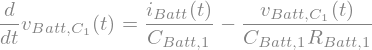

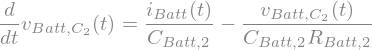

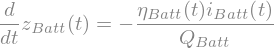

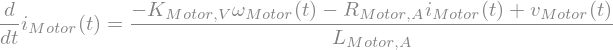

In [120]:
eqs_obs_states = [
    eq_batt_dvc1dt,   # d(v_C1)/dt
    eq_batt_dvc2dt,   # d(v_C2)/dt
    eq_batt_dzdt,     # d(z)/dt
    eq_motor_didt,    # d(i_motor)/dt (motor_w appears as input)
]
[display(eq) for eq in eqs_obs_states];

In [121]:
## Battery:

# Signed power model
# [ASSUMPTION]: batt_i > 0 => discharge, so P_out = V * I, P_in = -V * I
eq_batt_p_out = sym.Eq(batt_p_out, batt_v * batt_i)
eq_batt_p_in = sym.Eq(batt_p_in, -batt_v * batt_i)

eq_obs_others_i_in = eq_others_i_in2                     # others_i_in = others_p_in / batt_v
eq_obs_batt_i    = eq_batt_i                         # batt_i = others_i_in + esc_i_in - mppts_i_out
eq_obs_batt_v_oc = eq_batt_v_oc                      # batt_v_oc = poly(batt_z)
eq_obs_batt_p_out   = eq_batt_p_out
eq_obs_batt_p_in   = eq_batt_p_in


## PVs:

# Panel incident power (single equivalent PV)
eq_obs_pv_p_in = eq_pv_p_in     # pv_p_in = pv_g * pv_S

# PV electrical power and efficiency
eq_obs_pv_p_out = eq_pv_p_out     # pv_p_out = pv_eta * pv_p_in

# Multiple panels
eq_obs_pvs_p_in = eq_pvs_p_in   # pvs_p_in = pvs_N * pv_p_in
eq_obs_pvs_p_out = eq_pvs_p_out   # pvs_p_out = pvs_N * pv_p_out

# [ASSUMPTION]: aggregated PV efficiency (electrical output / incident):
pvs_eta = f(r"\eta_{PVs}", real=True, positive=True)(t)
eq_obs_pvs_eta = sym.Eq(
    pvs_eta,
    pvs_p_out / pvs_p_in
)


## MPPTs:

# MPPT single-channel relations
eq_obs_mppt_p_in = eq_mppt_p_in   # mppt_p_in = mppt_i_in * mppt_v_in
eq_obs_mppt_p_out = eq_mppt_p_out   # mppt_p_out = mppt_eta * mppt_p_in
eq_obs_mppt_i_out = eq_mppt_i_out   # mppt_i_out = mppt_p_out / mppt_v_out

# MPPT aggregate
eq_obs_mppts_p_in = eq_mppts_p_in   # mppts_p_in = mppts_N * mppt_p_in
eq_obs_mppts_p_out = eq_mppts_p_out   # mppts_p_out = mppts_N * mppt_p_out
eq_obs_mppts_i_out = eq_mppts_i_out   # mppts_i_out = mppts_N * mppt_i_out  (but mppts_i_out is given as input)

# Coupling to bus:
eq_obs_mppt_v_out_bus = eq_mppt_v_out_bus     # mppt_v_out = batt_v

# Total MPPT output power from measured IO and bus V
eq_obs_mppts_p_out_from_i_out = sym.Eq(
    mppts_p_out,
    batt_v * mppts_i_out
)

# Total MPPT input power using MPPT efficiency
eq_obs_mppts_p_in_from_p_out = sym.Eq(
    mppts_p_in,
    mppts_p_out / mppt_eta
)

# Total PV electrical output (to MPPT inputs)
# [ASSUMPTION]: no further losses; MPPT input power equals total PV electrical power
eq_obs_pvs_p_out_from_mppts = sym.Eq(
    pvs_p_out,
    mppts_p_in
)

# Total PV incident power from efficiency
eq_obs_pvs_p_in_from_p_out = sym.Eq(
    pvs_p_in,
    pvs_p_out / pv_eta
)

# Total PV output current (pre-MPPT) (needs PV voltage model; keep symbolic)
eq_obs_pvs_i_out = eq_pvs_i_out    # pvs_i_out = pvs_N * pv_i_out

# Aggregate MPPT efficiency (as an output)
mppts_eta = f(r"\eta_{MPPTs}", real=True, positive=True)(t)
eq_obs_mppts_eta = sym.Eq(
    mppts_eta,
    mppts_p_out / mppts_p_in
)

# [ASSUMPTION]: each PV string operates at a fixed MPP voltage pv_v_mpp (parameter)
# pv_v_mpp = sym.symbols(r"v_{PV,MPP}", real=True, positive=True)

# eq_obs_pv_v_out = sym.Eq(pv_v_out, pv_v_mpp)
# eq_obs_pv_i_out = sym.Eq(pv_i_out, pv_p_out / pv_v_out)

# eq_obs_mppt_v_in = eq_mppt_v_in.subs(eq_obs_pv_v_out.lhs, eq_obs_pv_v_out.rhs)  # mppt_v_in = pv_v_out
# eq_obs_mppt_i_in = eq_mppt_i_in.subs(eq_obs_pv_i_out.lhs, eq_obs_pv_i_out.rhs)  # mppt_i_in = pv_i_out


## ESC:

# DC bus / battery coupling
eq_obs_esc_v_in = eq_esc_v_in2                     # esc_v_in = batt_v
eq_obs_esc_v_out = eq_esc_v_out                      # esc_v_out = esc_d * esc_v_in

# Currents (esc_i_in is input, esc_i_out = motor_i from coupling)
eq_obs_esc_i_out = eq_esc_motor_current           # motor_i = esc_i_out

# Power
eq_obs_esc_p_in = eq_esc_p_in                      # esc_p_in = esc_i_in * esc_v_in
eq_obs_esc_p_out = eq_esc_p_out                      # esc_p_out = esc_i_out * esc_v_out

# RMS currents and switching-node voltage
eq_obs_esc_i_m_rms = eq_esc_i_m_rms
eq_obs_esc_i_d_rms = eq_esc_i_d_rms
eq_obs_esc_i_d_avg = eq_esc_i_d_avg
eq_obs_esc_vds_sw   = eq_esc_vds_sw

# Conduction and switching losses
eq_obs_esc_p_m_c  = eq_esc_p_m_c
eq_obs_esc_p_d_c  = eq_esc_p_d_c
eq_obs_esc_p_m_sw = eq_esc_p_m_sw
eq_obs_esc_p_d_sw = eq_esc_p_d_sw

eq_obs_esc_p_loss = eq_esc_p_loss              # p_loss = sum of the above

# Efficiency
eq_obs_esc_eta = eq_esc_eta6                   # simplified explicit η_ESC


## Motor:

# Voltage from ESC duty and bus:
eq_obs_motor_v = eq_motor_v2   # motor_v = esc_d * batt_v

# Powers and losses:
eq_obs_motor_p_in = eq_motor_p_in
eq_obs_motor_p_out = eq_motor_p_out
eq_obs_motor_pl = eq_motor_pl
eq_obs_motor_p_out2 = eq_motor_p_out2

# Load torque from prop + transmission side:
eq_obs_motor_q_load = eq_motor_q_load_prop  # motor_q_load = f(prop_q, trans_k, ...)

# Efficiency:
# motor_eta via eq_motor_p_out2: motor_p_out = motor_eta * motor_p_in
# (you already have this)


## Transmission:

eq_obs_trans_w_in = eq_trans_w_in            # trans_w_in = motor_w
eq_obs_trans_w_out = eq_trans_w_out            # trans_w_out = trans_k * trans_w_in
eq_obs_trans_p_in = eq_trans_p_in2           # trans_p_in from prop side
eq_obs_trans_p_out = eq_trans_p_out
eq_obs_trans_p_out2 = eq_trans_p_out2          # consistency with η_Trans
eq_obs_trans_q_in = eq_trans_q_in2
eq_obs_trans_q_out = eq_trans_q_out


## Propeller:

# Kinematics (motor_w input, hull_u input)
eq_obs_prop_w = eq_prop_w_from_motor      # prop_w = trans_k * motor_w
eq_obs_prop_n = eq_prop_n2                # prop_n = prop_w / (2π)
eq_obs_prop_u = eq_prop_u          # prop_u = hull_u

# Advance ratio and open-water relation
eq_obs_prop_j    = eq_prop_j2             # j = u / (n D)
eq_obs_prop_jrel = eq_prop_j_relation     # j_ow = j (1 - hull_W)

# Coefficients (polynomials in j_ow)
eq_obs_prop_k_t_ow = eq_prop_k_t_ow
eq_obs_prop_k_q_ow = eq_prop_k_q_ow

# Thrust and torque in OW
eq_obs_prop_t_ow = eq_prop_t_ow
eq_obs_prop_q_ow = eq_prop_q_ow

# Coupling to behind-hull quantities
eq_obs_prop_t = eq_prop_t2                # prop_t = prop_t_ow
eq_obs_prop_q = eq_prop_q2                # prop_q = prop_q_ow / η_R

# Powers and efficiencies
eq_obs_prop_p_in_ow = eq_prop_p_in_ow
eq_obs_prop_p_out_ow = eq_prop_p_out_ow
eq_obs_prop_eta_ow = eq_prop_eta_ow

eq_obs_prop_p_in = eq_prop_p_in
eq_obs_prop_p_out = eq_prop_p_out
eq_obs_prop_eta = eq_prop_eta
eq_obs_prop_p_in2 = eq_prop_p_in2

# [ASSUMPTION]: "prop_u_ow" as the open-water inflow that would yield the same J_ow
# We can define: prop_u_ow = prop_j_ow * prop_n * prop_D
prop_u_ow = f(r"u_{Prop,ow}", real=True, positive=True)(t)
prop_j_ow = prop_j_ow   # from eq_prop_j_relation's LHS
eq_obs_prop_u_ow = sym.Eq(
    prop_u_ow,
    prop_j_ow * prop_n * prop_D
)


## Hull:

eq_obs_hull_r   = eq_hull_r_t
eq_obs_hull_p_in  = eq_hull_p_in
eq_obs_hull_p_out  = eq_hull_p_out
eq_obs_hull_eta = eq_hull_eta
eq_obs_hull_t   = eq_hull_t  # hull_t = prop_t


# Others:

eq_obs_others_v_in  = eq_others_v_in        # others_v_in = batt_v
eq_obs_others_i_in  = eq_others_i_in2       # others_i_in = others_p_in / batt_v
# others_p_in is a parameter; we just expose it as output


eqs_obs_outputs = [
    # Battery
    eq_obs_others_i_in,
    eq_obs_batt_i,
    eq_obs_batt_v_oc,
    eq_obs_batt_p_out,
    eq_obs_batt_p_in,

    # PV / MPPT
    eq_obs_pv_p_in,
    eq_obs_pv_p_out,
    eq_obs_pvs_p_in,
    eq_obs_pvs_p_out,
    eq_obs_pvs_eta,
    eq_obs_mppt_p_in,
    eq_obs_mppt_p_out,
    eq_obs_mppt_i_out,
    eq_obs_mppt_v_out_bus,
    eq_obs_mppts_p_in,
    eq_obs_mppts_p_out,
    eq_obs_mppts_i_out,
    eq_obs_mppts_p_out_from_i_out,
    eq_obs_mppts_p_in_from_p_out,
    eq_obs_pvs_p_out_from_mppts,
    eq_obs_pvs_p_in_from_p_out,
    eq_obs_mppts_eta,
    # (optional) pv_v_out / pv_i_out / mppt_v_in / mppt_i_in if you accept the MPP-voltage [ASSUMPTION]
    # eq_obs_pv_v_out,
    # eq_obs_pv_i_out,
    # eq_obs_mppt_v_in,
    # eq_obs_mppt_i_in,

    # ESC
    eq_obs_esc_v_in,
    eq_obs_esc_v_out,
    eq_obs_esc_i_out,
    eq_obs_esc_p_in,
    eq_obs_esc_p_out,
    eq_obs_esc_i_m_rms,
    eq_obs_esc_i_d_rms,
    eq_obs_esc_i_d_avg,
    eq_obs_esc_vds_sw,
    eq_obs_esc_p_m_c,
    eq_obs_esc_p_d_c,
    eq_obs_esc_p_m_sw,
    eq_obs_esc_p_d_sw,
    eq_obs_esc_p_loss,
    eq_obs_esc_eta,

    # Motor
    eq_obs_motor_v,
    eq_obs_motor_p_in,
    eq_obs_motor_p_out,
    eq_obs_motor_pl,
    eq_obs_motor_p_out2,
    eq_obs_motor_q_load,

    # Transmission
    eq_obs_trans_w_in,
    eq_obs_trans_w_out,
    eq_obs_trans_p_in,
    eq_obs_trans_p_out,
    eq_obs_trans_p_out2,
    eq_obs_trans_q_in,
    eq_obs_trans_q_out,

    # Propeller & hull
    eq_obs_prop_w,
    eq_obs_prop_n,
    eq_obs_prop_u,
    eq_obs_prop_j,
    eq_obs_prop_jrel,
    eq_obs_prop_k_t_ow,
    eq_obs_prop_k_q_ow,
    eq_obs_prop_t_ow,
    eq_obs_prop_q_ow,
    eq_obs_prop_t,
    eq_obs_prop_q,
    eq_obs_prop_p_in_ow,
    eq_obs_prop_p_out_ow,
    eq_obs_prop_eta_ow,
    eq_obs_prop_p_in,
    eq_obs_prop_p_out,
    eq_obs_prop_eta,
    eq_obs_prop_p_in2,
    eq_obs_prop_u_ow,

    eq_obs_hull_r,
    eq_obs_hull_p_in,
    eq_obs_hull_p_out,
    eq_obs_hull_eta,
    eq_obs_hull_t,

    # Other loads
    eq_obs_others_v_in,
    # eq_obs_others_i_in already included above
]


NameError: name 'eq_prop_j_relation' is not defined

In [ ]:
print('\n# Obs Inputs:\n')
for i, s in enumerate(obs_inputs):
    name = sym_to_name(s)
    print(f'{name} = U_obs[{i}]')

print('\n# Obs States:\n')
for i, s in enumerate(obs_states):
    name = sym_to_name(s)
    print(f'{name} = X_obs[{i}]')

print('\n# Obs Outputs mapping:\n')
for i, s in enumerate(obs_outputs):
    name = sym_to_name(s)
    print(f'{name} = Y_obs[{i}]')

print('\n# Obs State equations:\n')
for eq in eqs_obs_states:
    print(sym_to_python_auto(eq.simplify()))

print('\n# Obs Output equations:\n')
for eq in eqs_obs_outputs:
    if not isinstance(eq, sym.Equality):
        print(f"# Skipping non-Equality in eqs_obs_outputs: {eq}")
        continue
    # Avoid over-simplifying polynomials with Sum -> keep them as Eq
    print(sym_to_python_auto(eq))
